In [60]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier 
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, confusion_matrix

# Corrected import

In [61]:
data = pd.read_csv(r'C:\Users\Aditi\Downloads\bank.csv',sep=";")
data.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [62]:
data.rename(columns={"y": "loan_approval"}, inplace=True)

In [63]:
data.shape

(4521, 17)

In [64]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            4521 non-null   int64 
 1   job            4521 non-null   object
 2   marital        4521 non-null   object
 3   education      4521 non-null   object
 4   default        4521 non-null   object
 5   balance        4521 non-null   int64 
 6   housing        4521 non-null   object
 7   loan           4521 non-null   object
 8   contact        4521 non-null   object
 9   day            4521 non-null   int64 
 10  month          4521 non-null   object
 11  duration       4521 non-null   int64 
 12  campaign       4521 non-null   int64 
 13  pdays          4521 non-null   int64 
 14  previous       4521 non-null   int64 
 15  poutcome       4521 non-null   object
 16  loan_approval  4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [65]:
round((data.isnull().sum() * 100/ len(data)),2).sort_values(ascending=False)

age              0.0
day              0.0
poutcome         0.0
previous         0.0
pdays            0.0
campaign         0.0
duration         0.0
month            0.0
contact          0.0
job              0.0
loan             0.0
housing          0.0
balance          0.0
default          0.0
education        0.0
marital          0.0
loan_approval    0.0
dtype: float64

In [66]:
round((data.isna().sum() * 100/ len(data)),2).sort_values(ascending=False)

age              0.0
day              0.0
poutcome         0.0
previous         0.0
pdays            0.0
campaign         0.0
duration         0.0
month            0.0
contact          0.0
job              0.0
loan             0.0
housing          0.0
balance          0.0
default          0.0
education        0.0
marital          0.0
loan_approval    0.0
dtype: float64

In [67]:
data.describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000

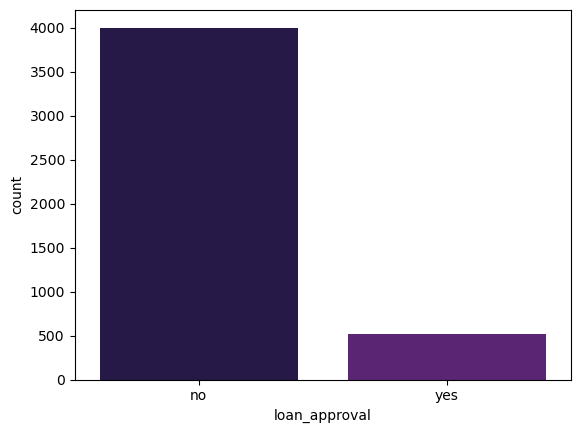

In [9]:
custom_palette = sns.color_palette("magma")

# Create the countplot with the specified color palette
sns.countplot(x='loan_approval', data=data, palette=custom_palette)

# Show the plot
plt.show()

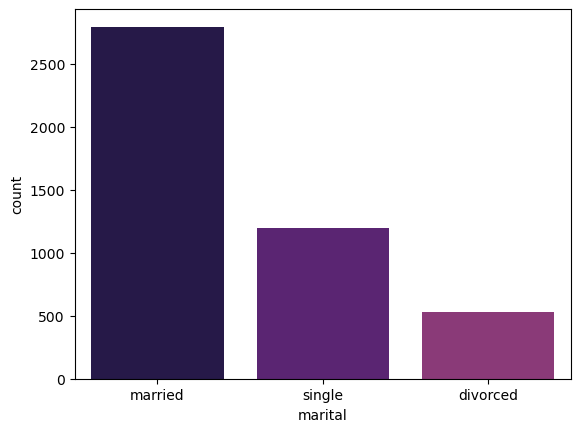

In [10]:
custom_palette = sns.color_palette("magma")
sns.countplot(x='marital', data=data, palette=custom_palette)
#  plot
plt.show()

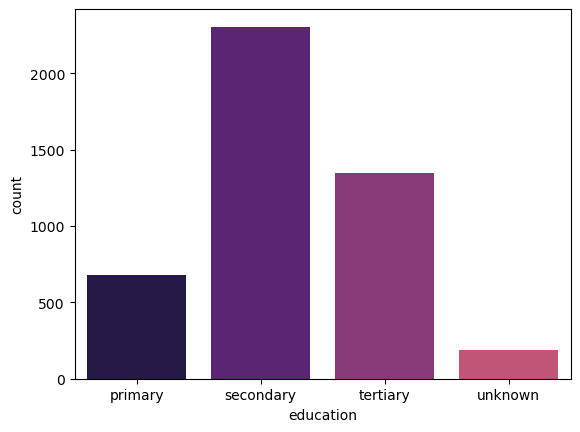

In [11]:
custom_palette = sns.color_palette("magma")
sns.countplot(x='education', data=data, palette=custom_palette)

#  plot
plt.show()

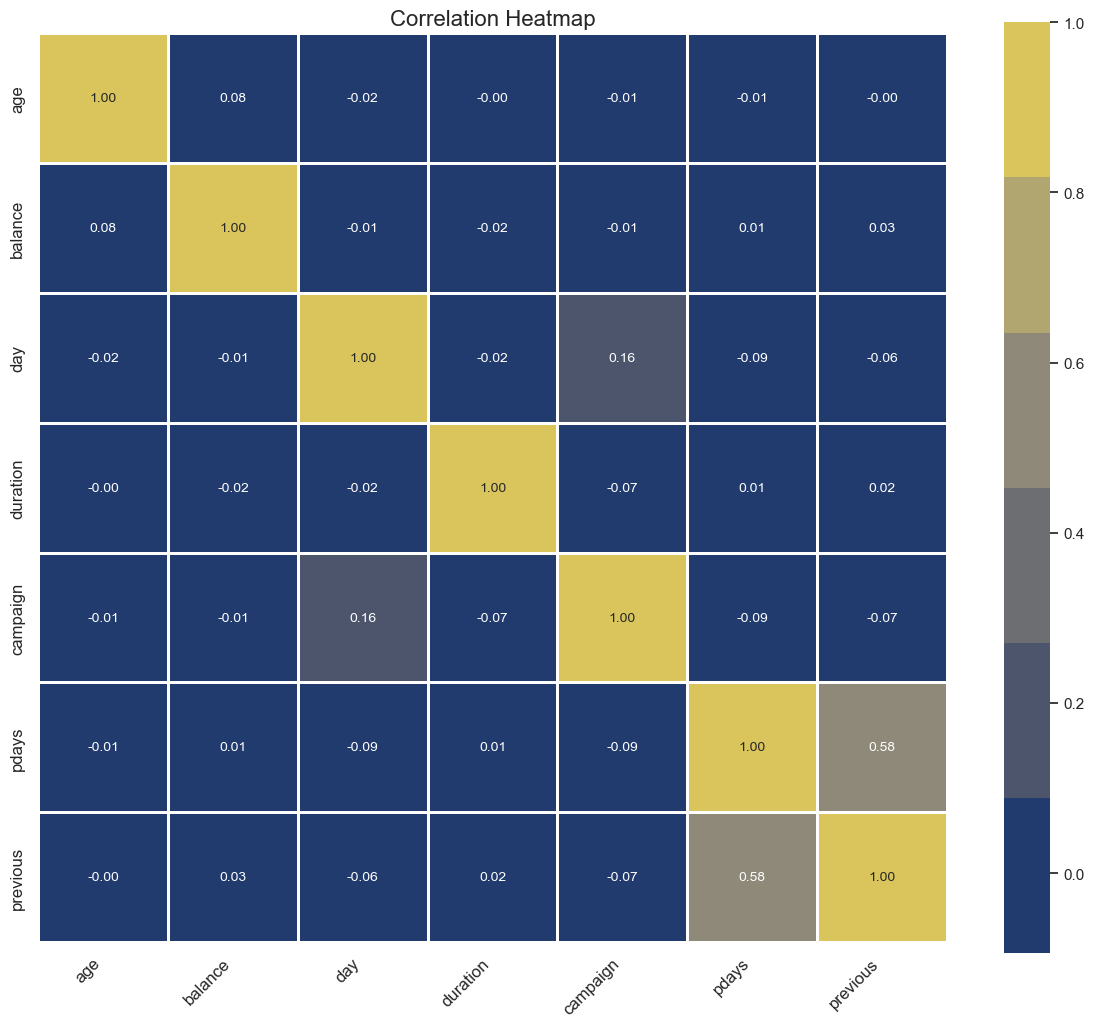

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_features = data.select_dtypes(include=['number']).columns
corr_matrix = data[numerical_features].corr()
sns.set(style='whitegrid')
palette = sns.color_palette("cividis")
plt.figure(figsize=(12, 12))
heatmap = sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap=palette,
                      square=True, linewidths=.8, annot_kws={"size": 10}, cbar_kws={'shrink': 0.8})
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(rotation=45, ha="right", fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

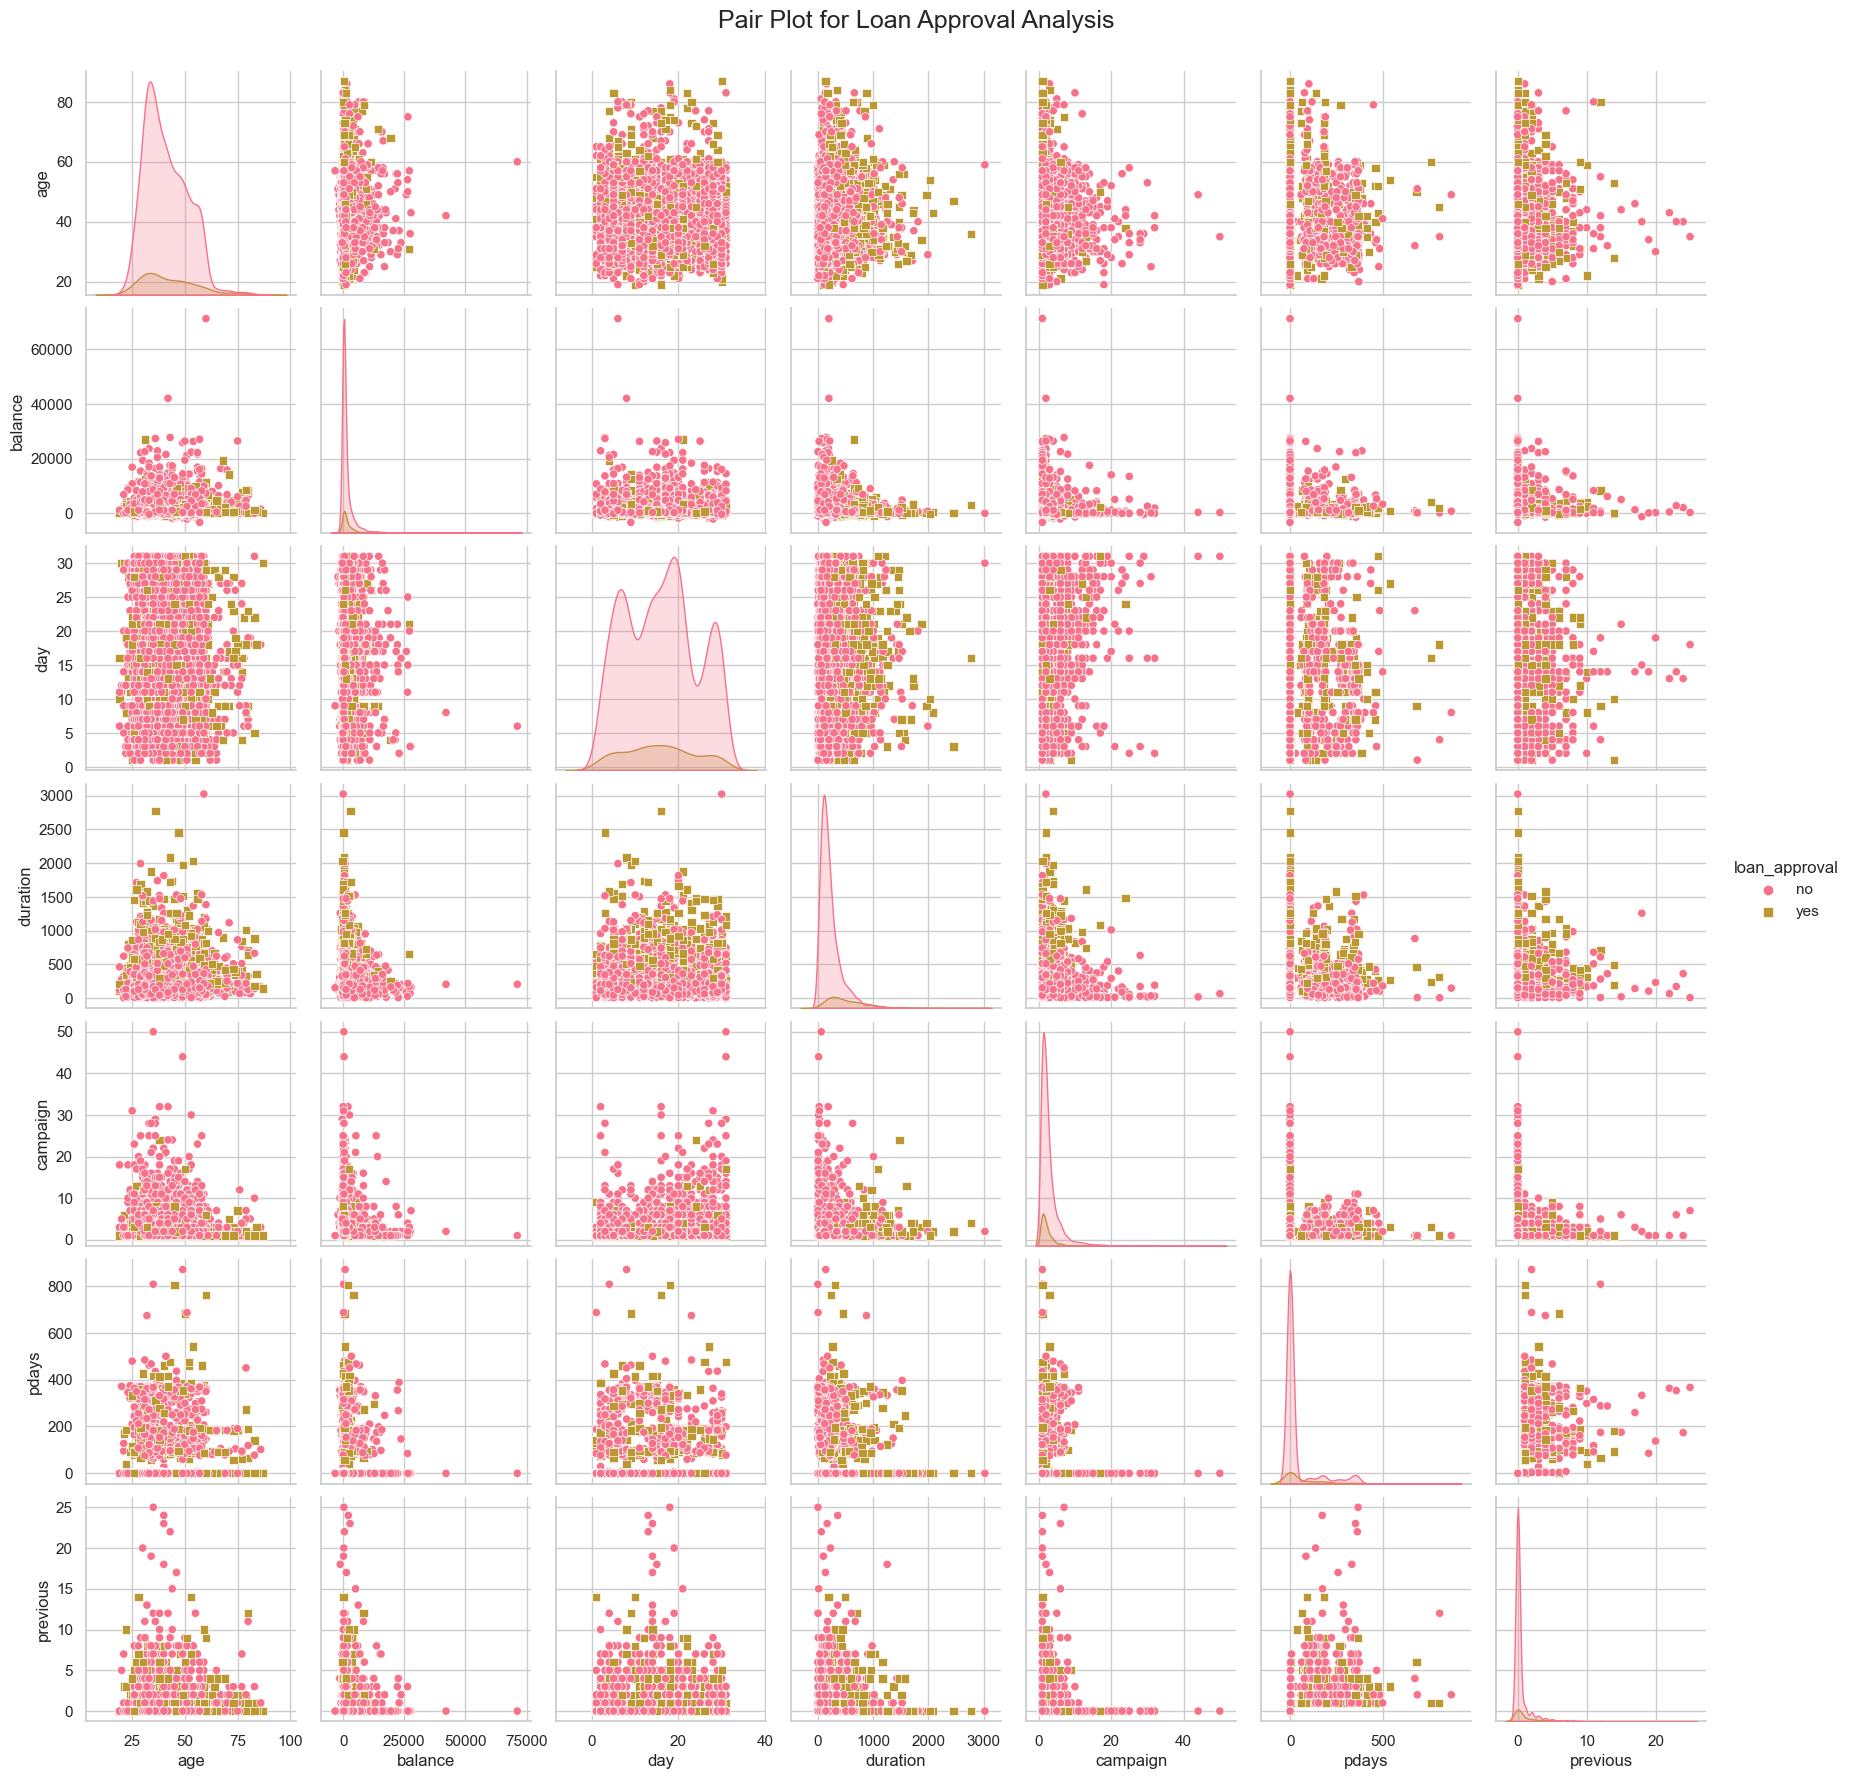

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
custom_palette = sns.color_palette("husl")
sns.pairplot(data, hue='loan_approval', palette=custom_palette, markers=["o", "s"], diag_kind='kde', height=2.5)
plt.suptitle('Pair Plot for Loan Approval Analysis', y=1.02, fontsize=18)
plt.show()


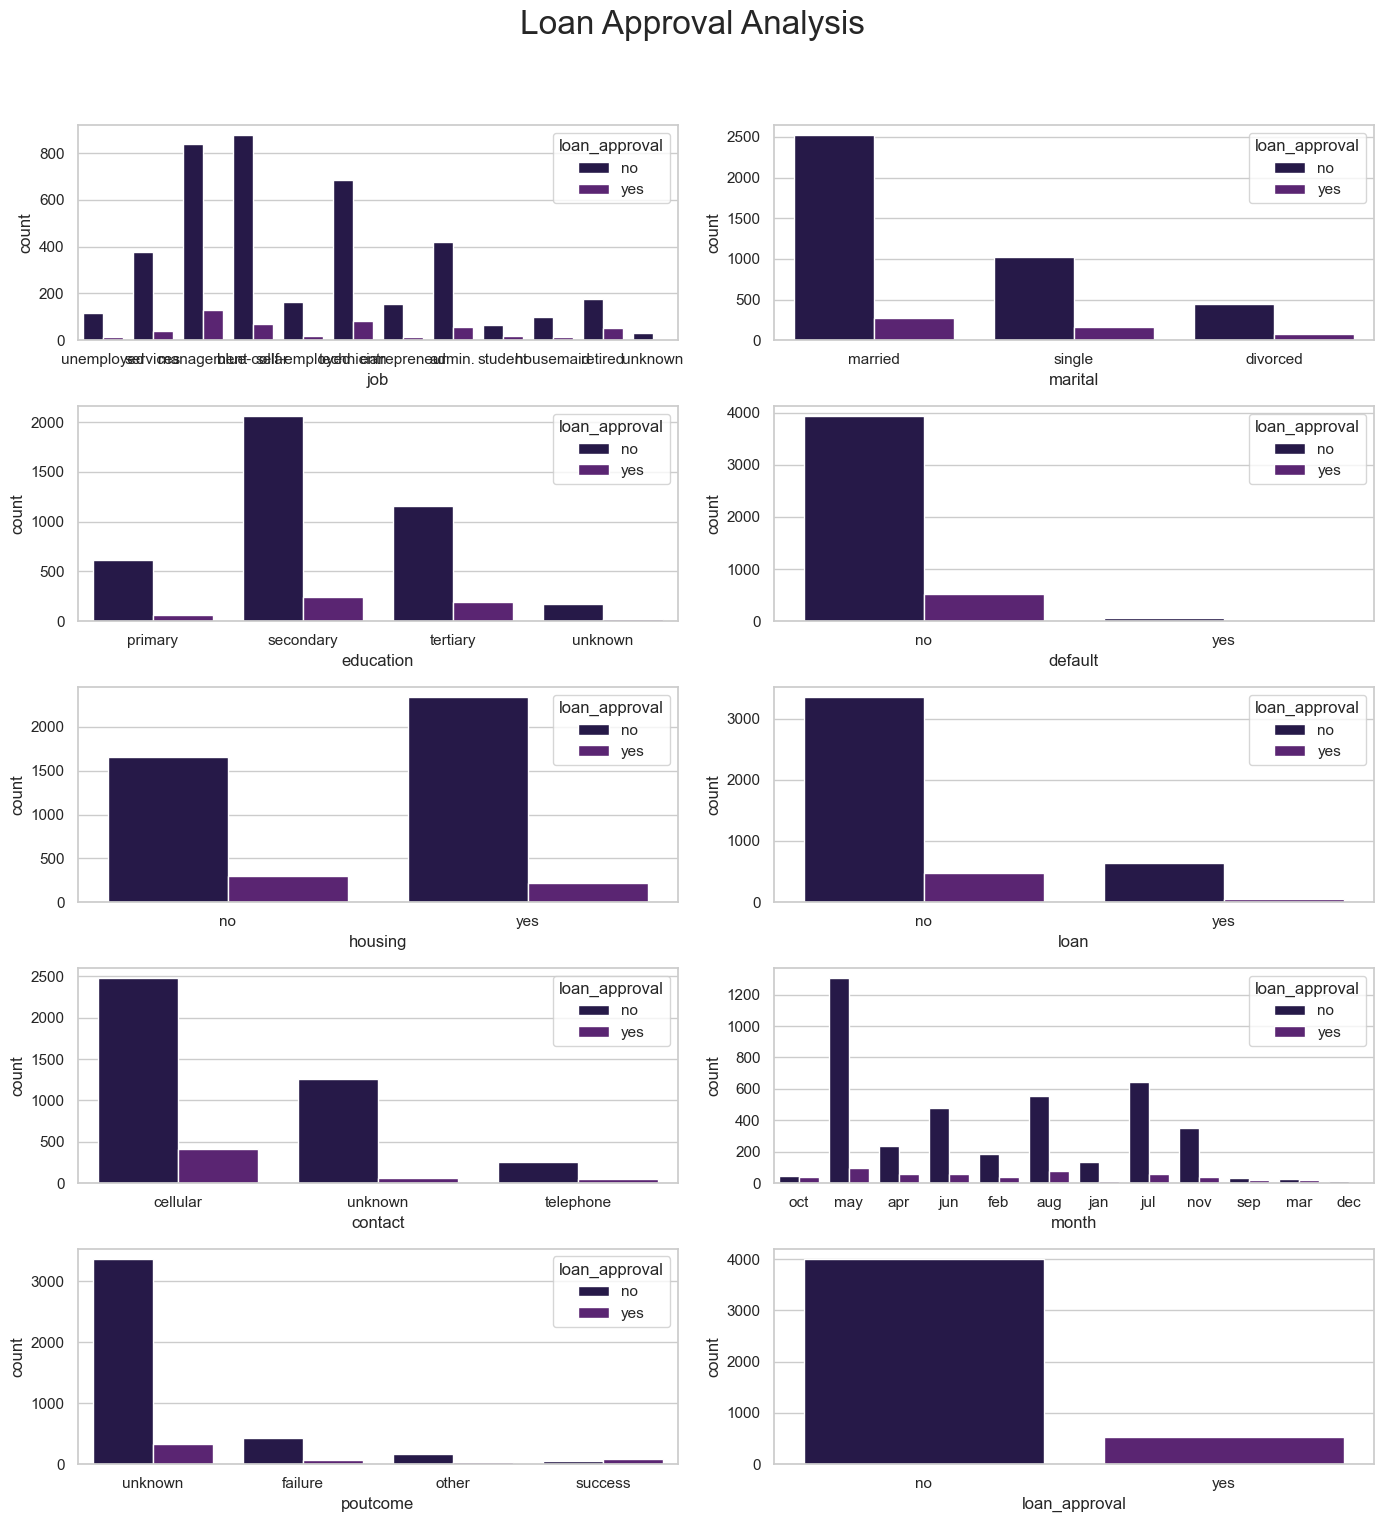

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
color_palette = sns.color_palette("magma")


# subplots 
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(14, 16))
fig.suptitle('Loan Approval Analysis', fontsize=24)

sns.countplot(x='job', hue='loan_approval', data=data, ax=axes[0, 0], palette=color_palette)
sns.countplot(x='marital', hue='loan_approval', data=data, ax=axes[0, 1], palette=color_palette)
sns.countplot(x='education', hue='loan_approval', data=data, ax=axes[1, 0], palette=color_palette)
sns.countplot(x='default', hue='loan_approval', data=data, ax=axes[1, 1], palette=color_palette)
sns.countplot(x='housing', hue='loan_approval', data=data, ax=axes[2, 0], palette=color_palette)
sns.countplot(x='loan', hue='loan_approval', data=data, ax=axes[2, 1], palette=color_palette)
sns.countplot(x='contact', hue='loan_approval', data=data, ax=axes[3, 0], palette=color_palette)
sns.countplot(x='month', hue='loan_approval', data=data, ax=axes[3, 1], palette=color_palette)
sns.countplot(x='poutcome', hue='loan_approval', data=data, ax=axes[4, 0], palette=color_palette)
sns.countplot(x='loan_approval', data=data, ax=axes[4, 1], palette=color_palette)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


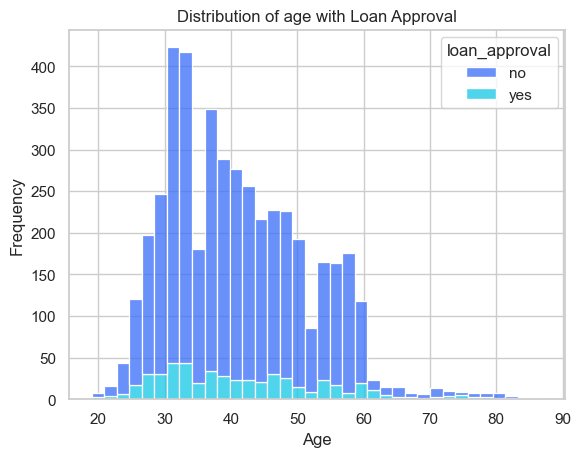

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
color_palette = sns.color_palette("rainbow")
sns.histplot(data=data, x='age', hue='loan_approval', palette=color_palette, multiple="stack")
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of age with Loan Approval')
plt.show()


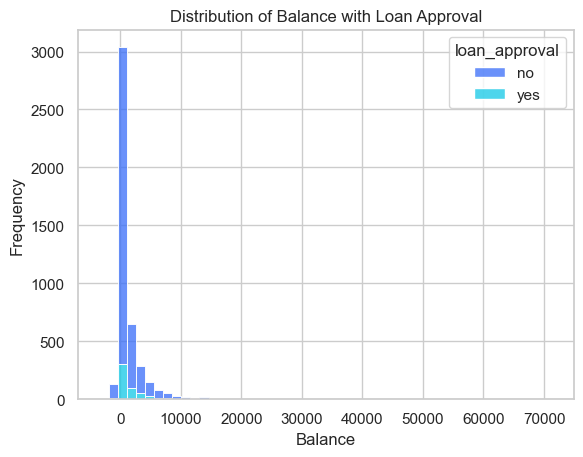

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
color_palette = sns.color_palette("rainbow")

#  histogram with specified range and color by 'loan_approval'
sns.histplot(data=data, x='balance', bins=50, hue='loan_approval', palette=color_palette, multiple="stack")
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Distribution of Balance with Loan Approval')
plt.show()


In [68]:
data.drop_duplicates(inplace=True)

In [12]:
data.shape

(4521, 17)

In [13]:
data.head()

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular   19   oct        79         1     -1         0  unknown   
1  cellular   11   may       220         1    339         4  failure   
2  cellular   16   apr       185         1    330         1  failure   
3   unknown    3   jun       199         4     -1         0  unknown   
4   unknown    5   may       226         1     -1         0  unknown   

  loan_approval  
0            no  
1            no  
2            no  
3            no  
4            no

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(conf_matrix, class_names, model_name):
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="rainbow",
                xticklabels=class_names, yticklabels=class_names)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [69]:
#'loan_approval' is the target variable
X = data.drop('loan_approval', axis=1)
y = data['loan_approval']

# Encode the target variable 
le = LabelEncoder()
y = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Identify categorical features
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

# transformers for preprocessing
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

# transformers to respective features
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', categorical_transformer, categorical_features),
        ('num', numerical_transformer, numerical_features)
    ])

#  SMOTE to the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(preprocessor.fit_transform(X_train), y_train)

# resampled data into training and testing sets
X_train_resampled, X_test_resampled, y_train_resampled, y_test_resampled = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

Random Forest Accuracy: 0.9483568075117371
Mean Squared Error: 0.051643192488262914
Root Mean Squared Error: 0.2272513861085624
R-squared Score: 0.7932976364059647
              precision    recall  f1-score   support

           0       0.95      0.95      0.95       623
           1       0.95      0.95      0.95       655

    accuracy                           0.95      1278
   macro avg       0.95      0.95      0.95      1278
weighted avg       0.95      0.95      0.95      1278



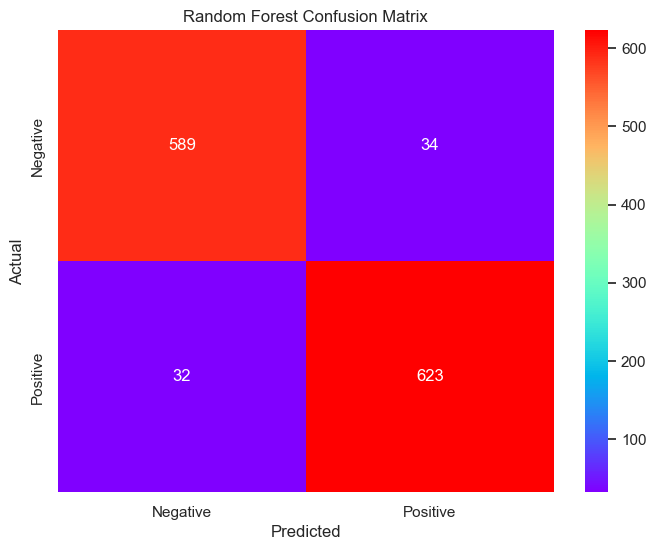

In [166]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import accuracy_score
model = RandomForestClassifier(random_state=42)

#  pipeline
pipeline = Pipeline(steps=[('classifier', model)])

# Train
pipeline.fit(X_train_resampled, y_train_resampled)

# predictions
y_pred = pipeline.predict(X_test_resampled)

# Evaluate accuracy
rf_accuracy = accuracy_score(y_test_resampled, y_pred)
print("Random Forest Accuracy:", rf_accuracy)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_resampled, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_resampled, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')

print(classification_report(y_test_resampled, y_pred))

rf_conf_matrix = confusion_matrix(y_test_resampled, y_pred)

plot_confusion_matrix(rf_conf_matrix, ['Negative', 'Positive'], 'Random Forest')

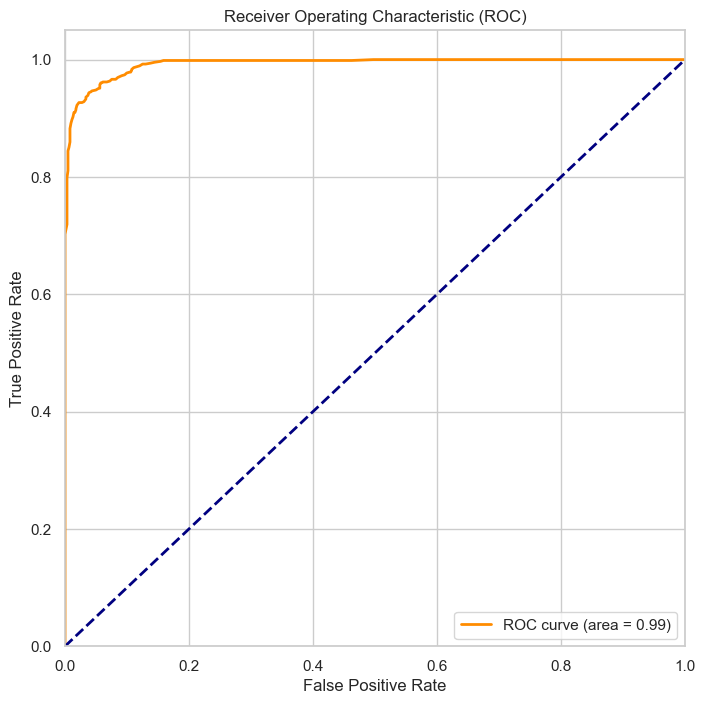

In [168]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#  ROC curve and AUC for the top 20 variables
fpr, tpr, thresholds = roc_curve(y_test_resampled, model.predict_proba(X_test_resampled)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 50}
Best F1 Score for Random Forest: nan
Random Forest Accuracy: 0.9475743348982786
Mean Squared Error for Random Forest: 0.05242566510172144
Root Mean Squared Error for Random Forest: 0.22896651524124972
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       623
           1       0.95      0.95      0.95       655

    accuracy                           0.95      1278
   macro avg       0.95      0.95      0.95      1278
weighted avg       0.95      0.95      0.95      1278



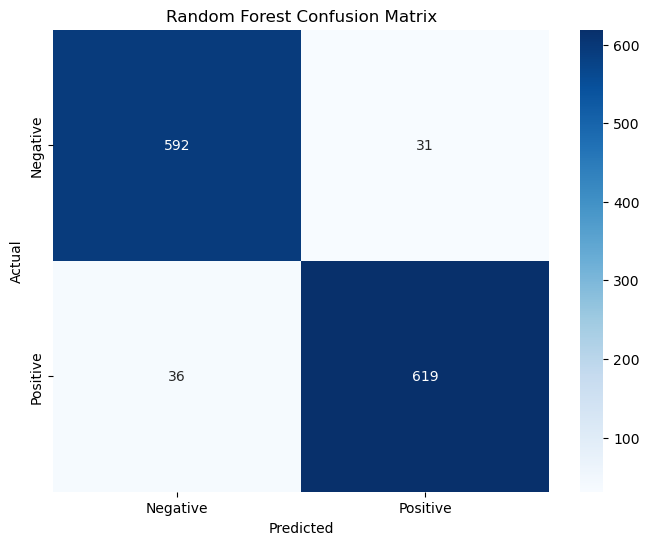

In [18]:
# Creating a custom scorer for F1 score
f1_class_1_scorer = make_scorer(f1_score, pos_label='yes')

# Defining the parameter grid for Random Forest(hypertuning)
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 5, 10, 15],
    'max_features': ['sqrt', 'log2', None]
}

#Random Forest Classifier
rf_clf = RandomForestClassifier(random_state=42)

# Setting up GridSearchCV with F1 score as the scoring metric
grid_search_rf = GridSearchCV(estimator=rf_clf,
                               param_grid=param_grid_rf,
                               scoring=f1_class_1_scorer,
                               cv=5,
                               verbose=1)

grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Best parameters and best score for Random Forest
best_params_rf = grid_search_rf.best_params_
best_score_rf = grid_search_rf.best_score_

print("Best Parameters for Random Forest:", best_params_rf)
print("Best F1 Score for Random Forest:", best_score_rf)

#  Random Forest model
rf_model = RandomForestClassifier(**best_params_rf, random_state=42)

# pipeline
rf_pipeline = Pipeline(steps=[('classifier', rf_model)])

# Train
rf_pipeline.fit(X_train_resampled, y_train_resampled)

# predictions
y_pred_rf = rf_pipeline.predict(X_test_resampled)

# Evaluate accuracy
rf_accuracy = accuracy_score(y_test_resampled, y_pred_rf)
print("Random Forest Accuracy:", rf_accuracy)

# Calculate evaluation metrics
mse_rf = mean_squared_error(y_test_resampled, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print(f'Mean Squared Error for Random Forest: {mse_rf}')
print(f'Root Mean Squared Error for Random Forest: {rmse_rf}')

print(classification_report(y_test_resampled, y_pred_rf))

rf_conf_matrix = confusion_matrix(y_test_resampled, y_pred_rf)

# confusion matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(rf_conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Random Forest Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Decision Tree Accuracy: 0.9256651017214398
Mean Squared Error: 0.07433489827856025
Root Mean Squared Error: 0.27264427057717583
R-squared Score: 0.7024738705843432
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       623
           1       0.93      0.93      0.93       655

    accuracy                           0.93      1278
   macro avg       0.93      0.93      0.93      1278
weighted avg       0.93      0.93      0.93      1278



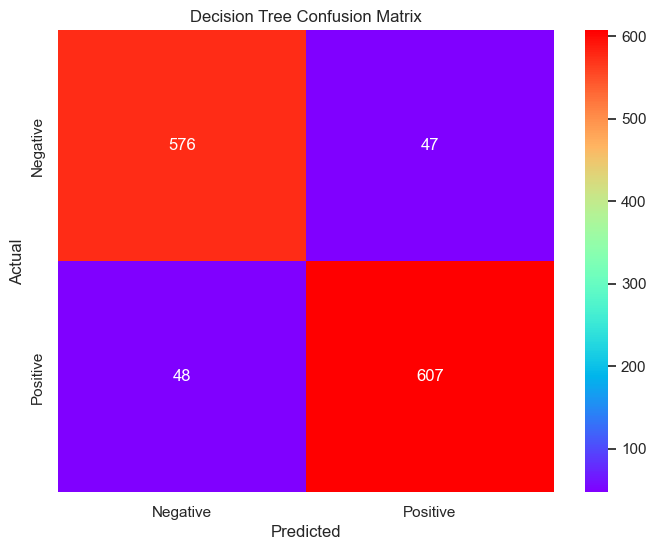

In [164]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)

# pipeline
dt_pipeline = Pipeline(steps=[('classifier', dt_model)])

# Train the model on the resampled training data
dt_pipeline.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_dt = dt_pipeline.predict(X_test_resampled)

# Evaluate accuracy
dt_accuracy = accuracy_score(y_test_resampled, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)

# evaluation metrics
mse = mean_squared_error(y_test_resampled, y_pred_dt)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_resampled, y_pred_dt)

# Print the metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')

print(classification_report(y_test_resampled, y_pred_dt))

dt_conf_matrix = confusion_matrix(y_test_resampled, y_pred_dt)

plot_confusion_matrix(dt_conf_matrix, ['Negative', 'Positive'], 'Decision Tree')

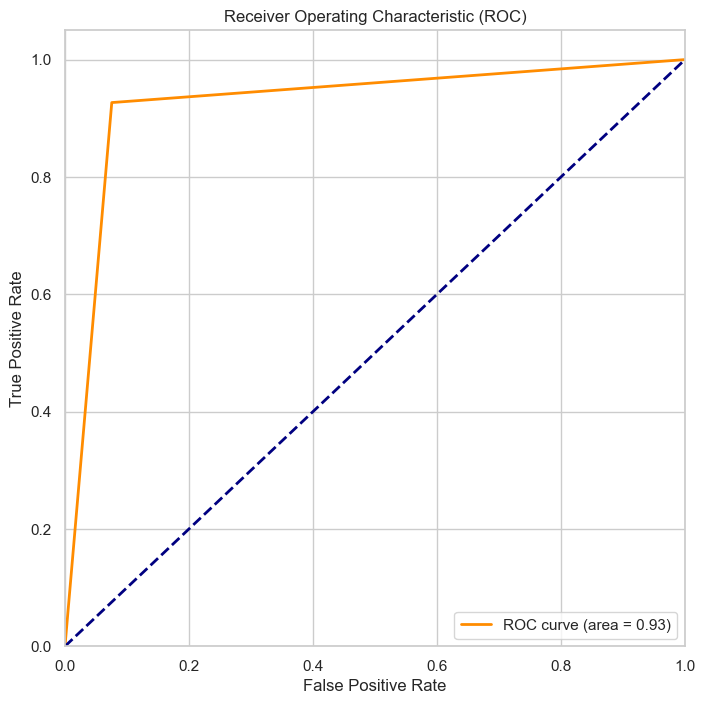

In [165]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#  ROC curve and AUC for the top 20 variables
fpr, tpr, thresholds = roc_curve(y_test_resampled, dt_model.predict_proba(X_test_resampled)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best F1 Score for Decision Tree: nan
Decision Tree Accuracy: 0.9256651017214398
Mean Squared Error for Decision Tree: 0.07433489827856025
Root Mean Squared Error for Decision Tree: 0.27264427057717583
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       623
           1       0.93      0.93      0.93       655

    accuracy                           0.93      1278
   macro avg       0.93      0.93      0.93      1278
weighted avg       0.93      0.93      0.93      1278



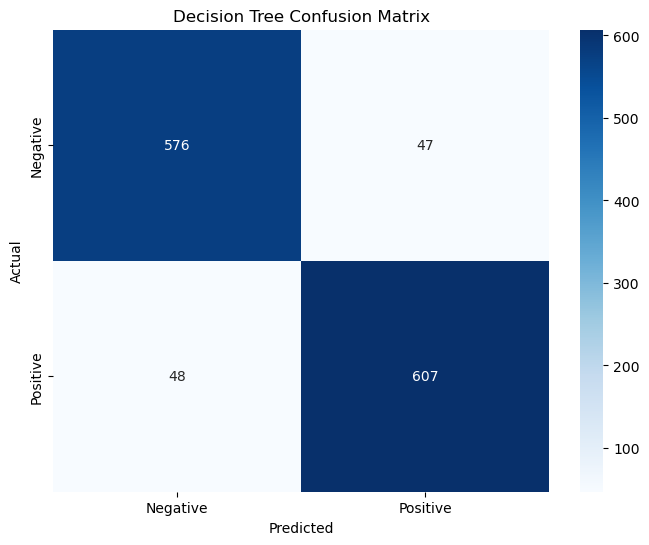

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, mean_squared_error, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a custom scorer for F1 score
f1_class_1_scorer = make_scorer(f1_score, pos_label='yes')

# Defining the parameter grid for Decision Tree
param_grid_dt = {
    'criterion': ['gini', 'entropy'],  # default='gini'
    'max_depth': [None, 5, 10, 15],  # default=None
    'min_samples_split': [2, 5, 10],  # default=2
    'min_samples_leaf': [1, 2, 4]  # default=1
}

#  Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)

# Setting up GridSearchCV with F1 score as the scoring metric
grid_search_dt = GridSearchCV(estimator=dt_clf,
                               param_grid=param_grid_dt,
                               scoring=f1_class_1_scorer,
                               cv=5,
                               verbose=1)

# Fit GridSearchCV on your data
grid_search_dt.fit(X_train_resampled, y_train_resampled)

# Best parameters and best score for Decision Tree
best_params_dt = grid_search_dt.best_params_
best_score_dt = grid_search_dt.best_score_

print("Best Parameters for Decision Tree:", best_params_dt)
print("Best F1 Score for Decision Tree:", best_score_dt)

# Decision Tree model
dt_model = DecisionTreeClassifier(**best_params_dt, random_state=42)

# pipeline
dt_pipeline = Pipeline(steps=[('classifier', dt_model)])

# Train 
dt_pipeline.fit(X_train_resampled, y_train_resampled)

#  predictions 
y_pred_dt = dt_pipeline.predict(X_test_resampled)

# Evaluate accuracy
dt_accuracy = accuracy_score(y_test_resampled, y_pred_dt)
print("Decision Tree Accuracy:", dt_accuracy)

mse_dt = mean_squared_error(y_test_resampled, y_pred_dt)
rmse_dt = np.sqrt(mse_dt)
print(f'Mean Squared Error for Decision Tree: {mse_dt}')
print(f'Root Mean Squared Error for Decision Tree: {rmse_dt}')

print(classification_report(y_test_resampled, y_pred_dt))

dt_conf_matrix = confusion_matrix(y_test_resampled, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(dt_conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Decision Tree Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Random Forest Accuracy: 0.8286384976525821
Mean Squared Error: 0.17136150234741784
Root Mean Squared Error: 0.4139583340717008
R-squared Score: 0.3141239753470647
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       623
           1       0.84      0.82      0.83       655

    accuracy                           0.83      1278
   macro avg       0.83      0.83      0.83      1278
weighted avg       0.83      0.83      0.83      1278



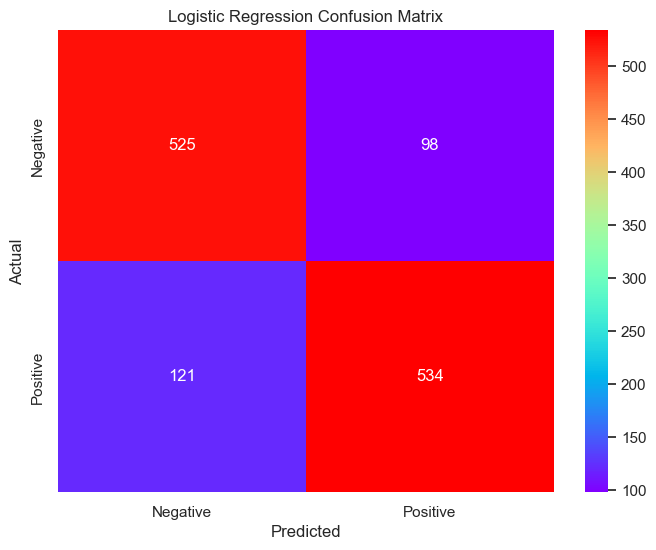

In [162]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(random_state=42)
lr_pipeline = Pipeline(steps=[('classifier', lr_model)])

# Train 
lr_pipeline.fit(X_train_resampled, y_train_resampled)

#  predictions 
y_pred_lr = lr_pipeline.predict(X_test_resampled)

# Evaluate accuracy
lr_accuracy = accuracy_score(y_test_resampled, y_pred_lr)
print("Logistic Regression Accuracy:", lr_accuracy)


mse = mean_squared_error(y_test_resampled, y_pred_lr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_resampled, y_pred_lr)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')

print(classification_report(y_test_resampled, y_pred_lr))

lr_conf_matrix = confusion_matrix(y_test_resampled, y_pred_lr)

plot_confusion_matrix(lr_conf_matrix, ['Negative', 'Positive'], 'Logistic Regression')

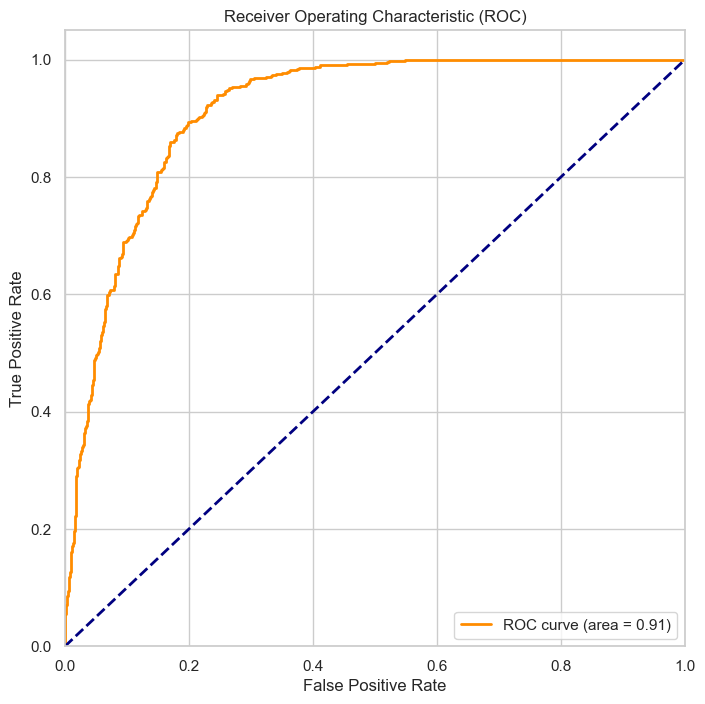

In [163]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#  ROC curve and AUC for the top 20 variables
fpr, tpr, thresholds = roc_curve(y_test_resampled, lr_model.predict_proba(X_test_resampled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [17]:
from sklearn.feature_selection import RFECV, SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LassoCV, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline
import numpy as np

lr_model = LogisticRegression(random_state=42)

#  pipeline
lr_pipeline = Pipeline(steps=[('classifier', lr_model)])

# Train 
lr_pipeline.fit(X_train_resampled, y_train_resampled)

#  predictions 
y_pred_lr = lr_pipeline.predict(X_test_resampled)
# 1. Recursive Feature Elimination (RFE)
rfe = RFECV(estimator=lr_model, step=1, cv=5)
X_train_rfe = rfe.fit_transform(X_train_resampled, y_train_resampled)
X_test_rfe = rfe.transform(X_test_resampled)

# 2. Feature Importance from Tree-based Models
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_resampled, y_train_resampled)
feature_importances = rf_model.feature_importances_
top_features_indices_rf = np.argsort(feature_importances)[::-1][:20]
X_train_rf = X_train_resampled[:, top_features_indices_rf]
X_test_rf = X_test_resampled[:, top_features_indices_rf]

# 3. Univariate Feature Selection
selector = SelectKBest(score_func=f_classif, k=20)
X_train_skb = selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_skb = selector.transform(X_test_resampled)

# 4. LASSO Regression (L1 Regularization)
lasso_model = LassoCV(cv=5)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
lasso_model.fit(X_train_scaled, y_train_resampled)
non_zero_indices = np.where(lasso_model.coef_ != 0)[0]
X_train_lasso = X_train_resampled[:, non_zero_indices]
X_test_lasso = X_test_resampled[:, non_zero_indices]
lr_model_rfe = LogisticRegression(random_state=42)
lr_pipeline_rfe = Pipeline(steps=[('classifier', lr_model_rfe)])
lr_pipeline_rfe.fit(X_train_rfe, y_train_resampled)
y_pred_lr_rfe = lr_pipeline_rfe.predict(X_test_rfe)
lr_accuracy_rfe = accuracy_score(y_test_resampled, y_pred_lr_rfe)
print("Logistic Regression Accuracy with RFE:", lr_accuracy_rfe)


# List of feature selection methods and their corresponding transformed datasets
methods = [('RFE', X_train_rfe, X_test_rfe),
           ('Tree-based', X_train_rf, X_test_rf),
           ('Univariate', X_train_skb, X_test_skb),
           ('LASSO', X_train_lasso, X_test_lasso)]

best_method = None
best_accuracy = 0.0

# Iterate over feature selection methods
for method_name, X_train_method, X_test_method in methods:
    # new logistic regression model
    lr_model_method = LogisticRegression(random_state=42)
    lr_pipeline_method = Pipeline(steps=[('classifier', lr_model_method)])

    # Train 
    lr_pipeline_method.fit(X_train_method, y_train_resampled)

    y_pred_lr_method = lr_pipeline_method.predict(X_test_method)

    #  accuracy
    lr_accuracy_method = accuracy_score(y_test_resampled, y_pred_lr_method)
    print(f"Logistic Regression Accuracy with {method_name}: {lr_accuracy_method}")

    # Check if this method has a higher accuracy
    if lr_accuracy_method > best_accuracy:
        best_accuracy = lr_accuracy_method
        best_method = method_name

print(f"\nBest Feature Selection Method: {best_method} with Accuracy: {best_accuracy}")



Logistic Regression Accuracy with RFE: 0.8278560250391236
Logistic Regression Accuracy with RFE: 0.8278560250391236
Logistic Regression Accuracy with Tree-based: 0.8208137715179968
Logistic Regression Accuracy with Univariate: 0.8192488262910798
Logistic Regression Accuracy with LASSO: 0.8255086071987481

Best Feature Selection Method: RFE with Accuracy: 0.8278560250391236


SVM Accuracy: 0.92018779342723
Mean Squared Error: 0.07981220657276995
Root Mean Squared Error: 0.28251054240996026
R-squared Score: 0.6805508926274
              precision    recall  f1-score   support

           0       0.95      0.88      0.91       623
           1       0.89      0.96      0.93       655

    accuracy                           0.92      1278
   macro avg       0.92      0.92      0.92      1278
weighted avg       0.92      0.92      0.92      1278



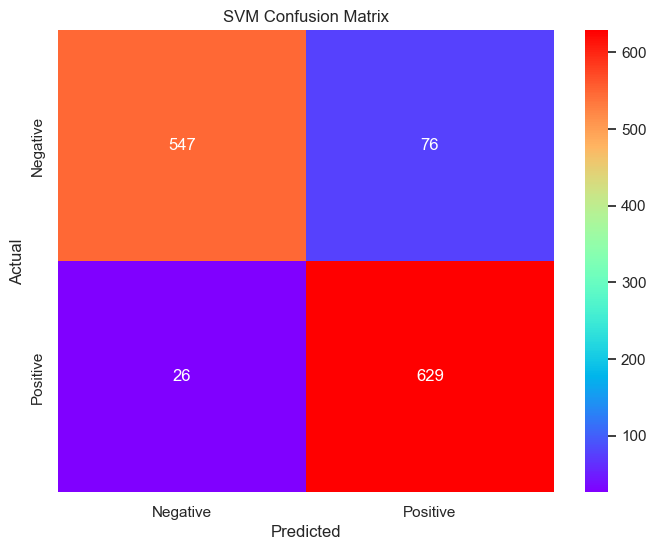

In [160]:
from sklearn.svm import SVC
svm_model = SVC(probability=True, random_state=42)

# pipeline
svm_pipeline = Pipeline(steps=[('classifier', svm_model)])

# Train 
svm_pipeline.fit(X_train_resampled, y_train_resampled)

#predictions 
y_pred_svm = svm_pipeline.predict(X_test_resampled)

# Evaluate accuracy
svm_accuracy = accuracy_score(y_test_resampled, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)

#  evaluation metrics
mse = mean_squared_error(y_test_resampled, y_pred_svm)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_resampled, y_pred_svm)

# Print the metrics
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')

print(classification_report(y_test_resampled, y_pred_svm))

svm_conf_matrix = confusion_matrix(y_test_resampled, y_pred_svm)

plot_confusion_matrix(svm_conf_matrix, ['Negative', 'Positive'], 'SVM')

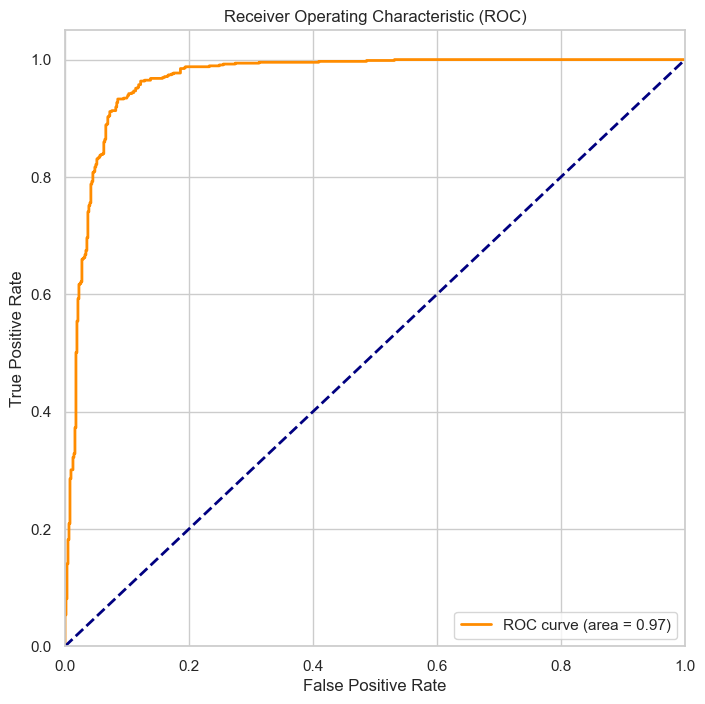

In [161]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate the ROC curve and AUC for the top 20 variables
fpr, tpr, thresholds = roc_curve(y_test_resampled, svm_model.predict_proba(X_test_resampled)[:, 1])
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best Parameters for SVM: {'C': 0.1, 'gamma': 'scale', 'kernel': 'linear'}
Best F1 Score for SVM: nan
SVM Accuracy: 0.8317683881064163
Mean Squared Error for SVM: 0.16823161189358374
Root Mean Squared Error for SVM: 0.41016047090569774
              precision    recall  f1-score   support

           0       0.82      0.83      0.83       623
           1       0.84      0.83      0.83       655

    accuracy                           0.83      1278
   macro avg       0.83      0.83      0.83      1278
weighted avg       0.83      0.83      0.83      1278



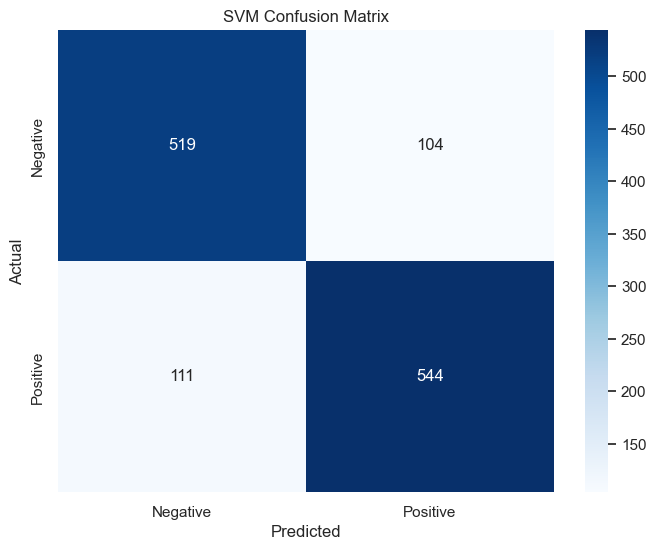

In [26]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, mean_squared_error, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a custom scorer for F1 score
f1_class_1_scorer = make_scorer(f1_score, pos_label='yes')

# Defining the parameter grid for SVM
param_grid_svm = {
    'C': [0.1, 1, 10],  # Regularization parameter, default=1.0
    'kernel': ['linear', 'rbf', 'poly'],  # Kernel type, default='rbf'
    'gamma': ['scale', 'auto'],  # Kernel coefficient, default='scale' for 'rbf', 'auto' for 'poly'
}

# Setting up the SVM Classifier
svm_clf = SVC(random_state=42)

# Setting up GridSearchCV with F1 score as the scoring metric
grid_search_svm = GridSearchCV(estimator=svm_clf,
                                param_grid=param_grid_svm,
                                scoring=f1_class_1_scorer,
                                cv=5,
                                verbose=1)


grid_search_svm.fit(X_train_resampled, y_train_resampled)

# Best parameters and best score for SVM
best_params_svm = grid_search_svm.best_params_
best_score_svm = grid_search_svm.best_score_

print("Best Parameters for SVM:", best_params_svm)
print("Best F1 Score for SVM:", best_score_svm)


svm_model = SVC(**best_params_svm, random_state=42, probability=True)

svm_pipeline = Pipeline(steps=[('classifier', svm_model)])

# Train 
svm_pipeline.fit(X_train_resampled, y_train_resampled)

#predictions
y_pred_svm = svm_pipeline.predict(X_test_resampled)

# Evaluate accuracy
svm_accuracy = accuracy_score(y_test_resampled, y_pred_svm)
print("SVM Accuracy:", svm_accuracy)

# Calculate evaluation metrics
mse_svm = mean_squared_error(y_test_resampled, y_pred_svm)
rmse_svm = np.sqrt(mse_svm)


print(f'Mean Squared Error for SVM: {mse_svm}')
print(f'Root Mean Squared Error for SVM: {rmse_svm}')


print(classification_report(y_test_resampled, y_pred_svm))

svm_conf_matrix = confusion_matrix(y_test_resampled, y_pred_svm)

plt.figure(figsize=(8, 6))
sns.heatmap(svm_conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Naive Bayes Accuracy: 0.7480438184663537
Mean Squared Error: 0.2519561815336463
Root Mean Squared Error: 0.5019523697858655
R-squared Score: -0.00845698601938416
              precision    recall  f1-score   support

           0       0.71      0.82      0.76       623
           1       0.80      0.68      0.73       655

    accuracy                           0.75      1278
   macro avg       0.75      0.75      0.75      1278
weighted avg       0.75      0.75      0.75      1278



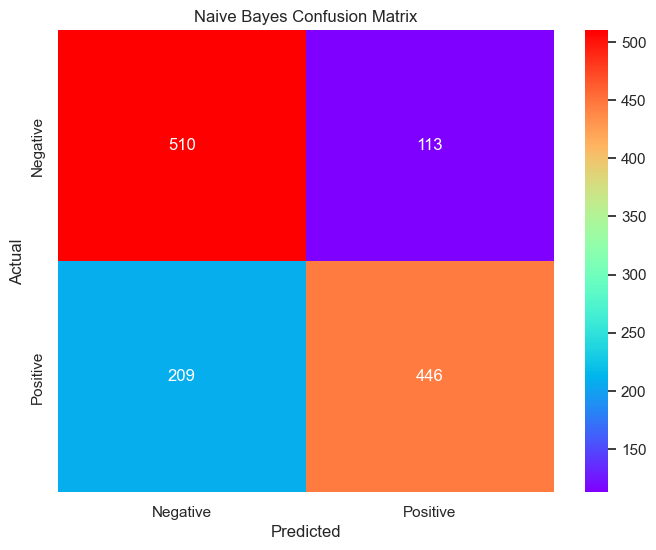

In [156]:
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB()

#  pipeline
nb_pipeline = Pipeline(steps=[('classifier', nb_model)])

# Train 
nb_pipeline.fit(X_train_resampled, y_train_resampled)

#  predictions
y_pred_nb = nb_pipeline.predict(X_test_resampled)
# Evaluate accuracy
nb_accuracy = accuracy_score(y_test_resampled, y_pred_nb)
print("Naive Bayes Accuracy:", nb_accuracy)


mse = mean_squared_error(y_test_resampled, y_pred_nb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_resampled, y_pred_nb)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')

print(classification_report(y_test_resampled, y_pred_nb))

nb_conf_matrix = confusion_matrix(y_test_resampled, y_pred_nb)

plot_confusion_matrix(nb_conf_matrix, ['Negative', 'Positive'], 'Naive Bayes')

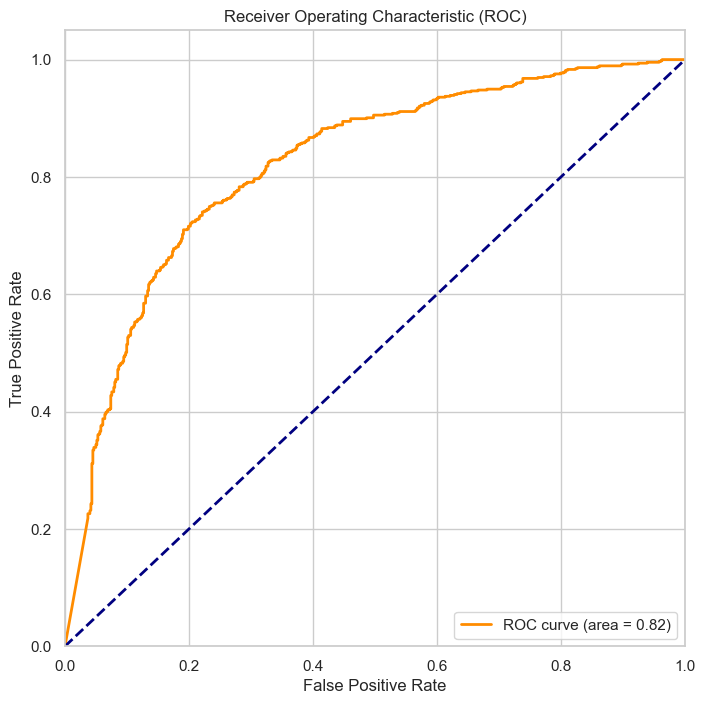

In [157]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

#  ROC curve and AUC for the top 20 variables
fpr, tpr, thresholds = roc_curve(y_test_resampled, nb_model.predict_proba(X_test_resampled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

K-NN Accuracy: 0.9154929577464789
Mean Squared Error: 0.08450704225352113
Root Mean Squared Error: 0.29070094986690553
R-squared Score: 0.661759768664306
              precision    recall  f1-score   support

           0       1.00      0.83      0.91       623
           1       0.86      1.00      0.92       655

    accuracy                           0.92      1278
   macro avg       0.93      0.91      0.91      1278
weighted avg       0.93      0.92      0.91      1278



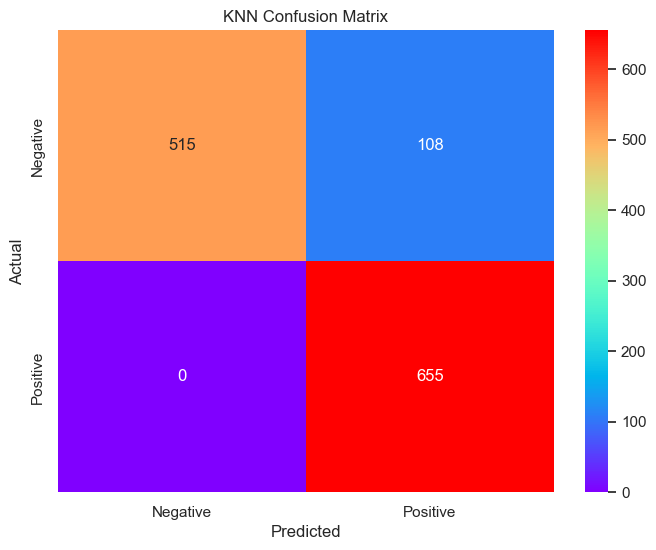

In [154]:
from sklearn.neighbors import KNeighborsClassifier


knn_model = KNeighborsClassifier()

#  pipeline
knn_pipeline = Pipeline(steps=[('classifier', knn_model)])

# Train 
knn_pipeline.fit(X_train_resampled, y_train_resampled)

y_pred_knn = knn_pipeline.predict(X_test_resampled)
#  accuracy
knn_accuracy = accuracy_score(y_test_resampled, y_pred_knn)
print("K-NN Accuracy:", knn_accuracy)


mse = mean_squared_error(y_test_resampled, y_pred_knn)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_resampled, y_pred_knn)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')

print(classification_report(y_test_resampled, y_pred_knn))

knn_conf_matrix = confusion_matrix(y_test_resampled, y_pred_knn)

plot_confusion_matrix(knn_conf_matrix, ['Negative', 'Positive'], 'KNN')

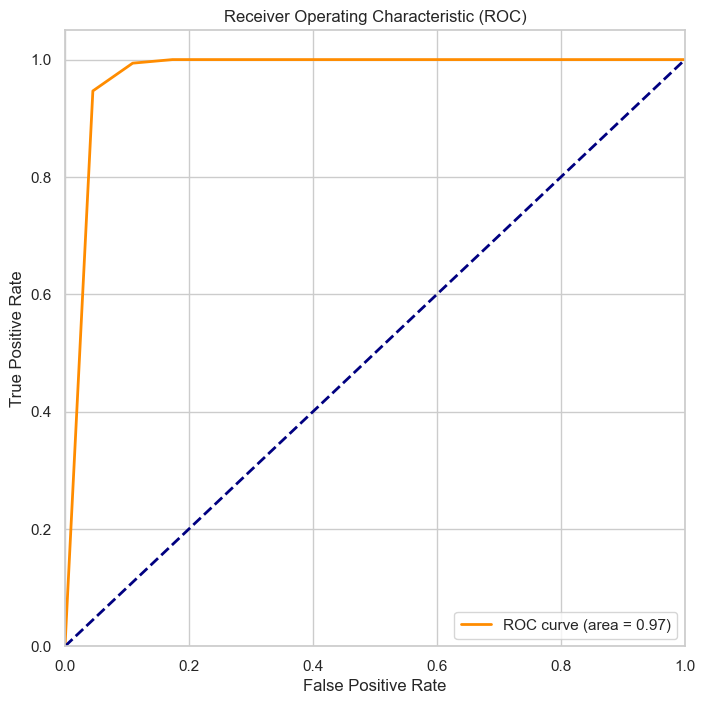

In [155]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC curve and AUC for the top 20 variables
fpr, tpr, thresholds = roc_curve(y_test_resampled, knn_model.predict_proba(X_test_resampled)[:, 1])
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters for KNN: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Best F1 Score for KNN: nan
KNN Accuracy: 0.9577464788732394
Mean Squared Error for KNN: 0.04225352112676056
Root Mean Squared Error for KNN: 0.2055566129482595
              precision    recall  f1-score   support

           0       0.99      0.92      0.96       623
           1       0.93      0.99      0.96       655

    accuracy                           0.96      1278
   macro avg       0.96      0.96      0.96      1278
weighted avg       0.96      0.96      0.96      1278



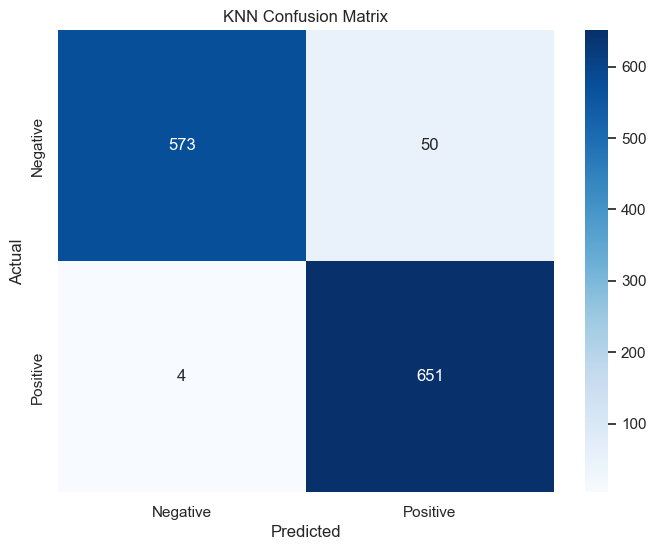

In [38]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, mean_squared_error, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a custom scorer for F1 score
f1_class_1_scorer = make_scorer(f1_score, pos_label='yes')

# Defining the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2],  # 1 for Manhattan distance, 2 for Euclidean distance
}

# Setting up the KNN Classifier
knn_clf = KNeighborsClassifier()

# Setting up GridSearchCV with F1 score as the scoring metric
grid_search_knn = GridSearchCV(estimator=knn_clf,
                                param_grid=param_grid_knn,
                                scoring=f1_class_1_scorer,
                                cv=5,
                                verbose=1)

# Fit GridSearchCV on your data
grid_search_knn.fit(X_train_resampled, y_train_resampled)

# Best parameters and best score for KNN
best_params_knn = grid_search_knn.best_params_
best_score_knn = grid_search_knn.best_score_

print("Best Parameters for KNN:", best_params_knn)
print("Best F1 Score for KNN:", best_score_knn)

# Define the KNN model
knn_model = KNeighborsClassifier(**best_params_knn)

# pipeline
knn_pipeline = Pipeline(steps=[('classifier', knn_model)])

# Train the model on the resampled training data
knn_pipeline.fit(X_train_resampled, y_train_resampled)


y_pred_knn = knn_pipeline.predict(X_test_resampled)

# Evaluate accuracy
knn_accuracy = accuracy_score(y_test_resampled, y_pred_knn)
print("KNN Accuracy:", knn_accuracy)

#  evaluation metrics
mse_knn = mean_squared_error(y_test_resampled, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)

print(f'Mean Squared Error for KNN: {mse_knn}')
print(f'Root Mean Squared Error for KNN: {rmse_knn}')

print(classification_report(y_test_resampled, y_pred_knn))

knn_conf_matrix = confusion_matrix(y_test_resampled, y_pred_knn)
plt.figure(figsize=(8, 6))
sns.heatmap(knn_conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('KNN Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Neural Net Accuracy: 0.9624413145539906
Mean Squared Error: 0.03755868544600939
Root Mean Squared Error: 0.1938006332446037
R-squared Score: 0.849671008295247
              precision    recall  f1-score   support

           0       0.99      0.93      0.96       623
           1       0.94      0.99      0.96       655

    accuracy                           0.96      1278
   macro avg       0.96      0.96      0.96      1278
weighted avg       0.96      0.96      0.96      1278



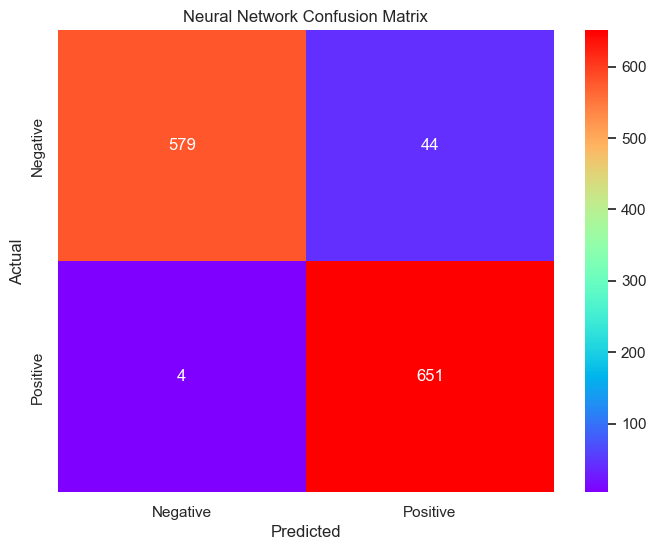

In [152]:
from sklearn.neural_network import MLPClassifier


nn_model = MLPClassifier(random_state=42)

#  pipeline
nn_pipeline = Pipeline(steps=[('classifier', nn_model)])

# Train 
nn_pipeline.fit(X_train_resampled, y_train_resampled)

#  predictions
y_pred_nn = nn_pipeline.predict(X_test_resampled)

# accuracy
nn_accuracy = accuracy_score(y_test_resampled, y_pred_nn)
print("Neural Net Accuracy:", nn_accuracy)

# Calculate evaluation metrics
mse = mean_squared_error(y_test_resampled, y_pred_nn)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_resampled, y_pred_nn)

print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')

print(classification_report(y_test_resampled, y_pred_nn))

nn_conf_matrix = confusion_matrix(y_test_resampled, y_pred_nn)

plot_confusion_matrix(nn_conf_matrix, ['Negative', 'Positive'], 'Neural Network')

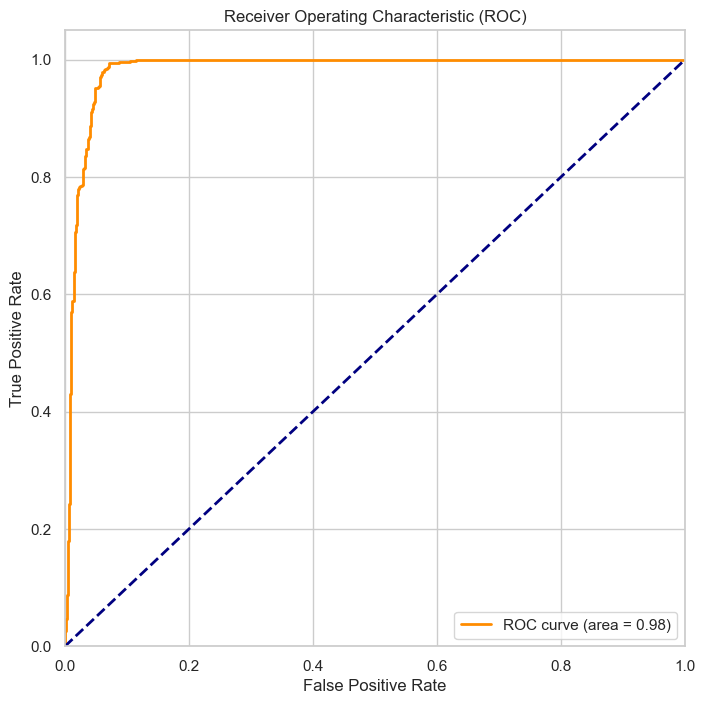

In [153]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

 ROC curve and AUC for the top 20 variables
fpr, tpr, thresholds = roc_curve(y_test_resampled, nn_model.predict_proba(X_test_resampled)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters for Neural Network: {'activation': 'logistic', 'alpha': 0.0001, 'hidden_layer_sizes': (50,)}
Best F1 Score for Neural Network: nan
Neural Network Accuracy: 0.9514866979655712
Mean Squared Error for Neural Network: 0.048513302034428794
Root Mean Squared Error for Neural Network: 0.2202573540984019
              precision    recall  f1-score   support

           0       0.97      0.93      0.95       623
           1       0.93      0.98      0.95       655

    accuracy                           0.95      1278
   macro avg       0.95      0.95      0.95      1278
weighted avg       0.95      0.95      0.95      1278



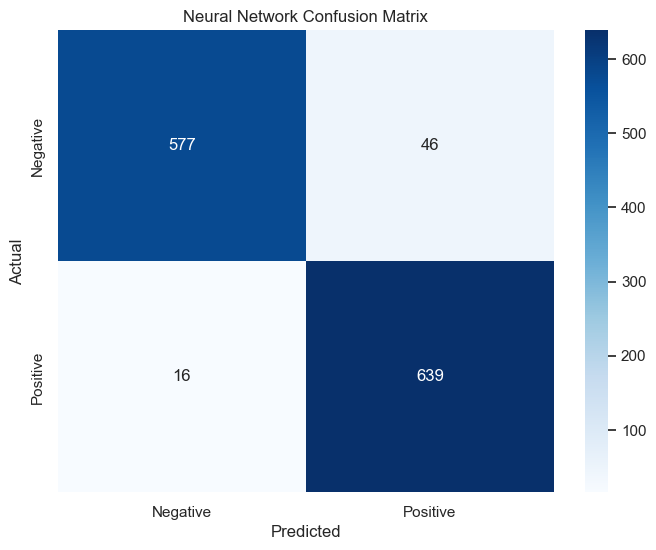

In [37]:
from sklearn.neural_network import MLPClassifier
# Creating a custom scorer for F1 score
f1_class_1_scorer = make_scorer(f1_score, pos_label='yes')

# Defining the parameter grid for Neural Network
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],
    'activation': ['logistic', 'tanh', 'relu'],
    'alpha': [0.0001, 0.001, 0.01],
}

# Setting up the Neural Network Classifier
nn_clf = MLPClassifier(random_state=42, max_iter=500)

# Setting up GridSearchCV with F1 score as the scoring metric
grid_search_nn = GridSearchCV(estimator=nn_clf,
                               param_grid=param_grid_nn,
                               scoring=f1_class_1_scorer,
                               cv=5,
                               verbose=1)

# Fit GridSearchCV on your data
grid_search_nn.fit(X_train_resampled, y_train_resampled)

# Best parameters and best score for Neural Network
best_params_nn = grid_search_nn.best_params_
best_score_nn = grid_search_nn.best_score_

print("Best Parameters for Neural Network:", best_params_nn)
print("Best F1 Score for Neural Network:", best_score_nn)

# Neural Network model
nn_model = MLPClassifier(**best_params_nn, random_state=42, max_iter=500)

# pipeline
nn_pipeline = Pipeline(steps=[('classifier', nn_model)])

# Train 
nn_pipeline.fit(X_train_resampled, y_train_resampled)

# predictions
y_pred_nn = nn_pipeline.predict(X_test_resampled)

# Evaluate accuracy
nn_accuracy = accuracy_score(y_test_resampled, y_pred_nn)
print("Neural Network Accuracy:", nn_accuracy)

#  evaluation metrics
mse_nn = mean_squared_error(y_test_resampled, y_pred_nn)
rmse_nn = np.sqrt(mse_nn)

#metrics
print(f'Mean Squared Error for Neural Network: {mse_nn}')
print(f'Root Mean Squared Error for Neural Network: {rmse_nn}')

print(classification_report(y_test_resampled, y_pred_nn))

nn_conf_matrix = confusion_matrix(y_test_resampled, y_pred_nn)


plt.figure(figsize=(8, 6))
sns.heatmap(nn_conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

XGB Accuracy: 0.9444444444444444
Mean Squared Error: 0.05555555555555555
Root Mean Squared Error: 0.23570226039551584
R-squared Score: 0.7776383664367197
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       623
           1       0.96      0.93      0.95       655

    accuracy                           0.94      1278
   macro avg       0.94      0.94      0.94      1278
weighted avg       0.94      0.94      0.94      1278



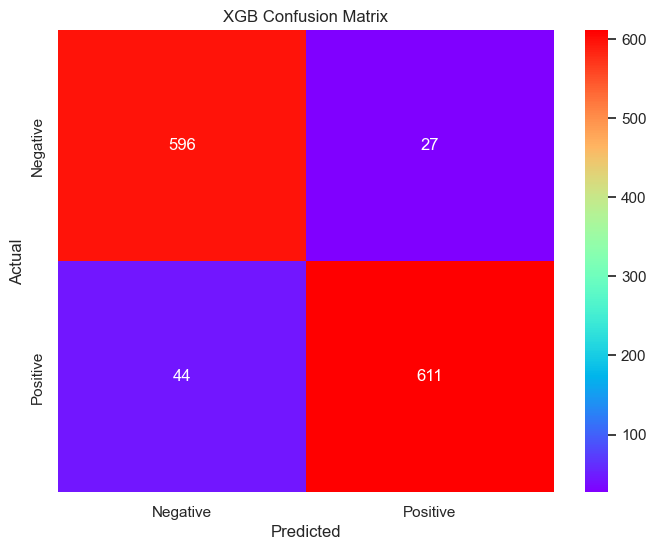

In [148]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state=42)

# pipeline
xgb_pipeline = Pipeline(steps=[('classifier', xgb_model)])

# Train 
xgb_pipeline.fit(X_train_resampled, y_train_resampled)

# predictions 
y_pred_xgb = xgb_pipeline.predict(X_test_resampled)

# Evaluate accuracy
xgb_accuracy = accuracy_score(y_test_resampled, y_pred_xgb)
print("XGB Accuracy:", xgb_accuracy)

# evaluation metrics
mse = mean_squared_error(y_test_resampled, y_pred_xgb)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_resampled, y_pred_xgb)
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')

print(classification_report(y_test_resampled, y_pred_xgb))

xgb_conf_matrix = confusion_matrix(y_test_resampled, y_pred_xgb)

plot_confusion_matrix(xgb_conf_matrix, ['Negative', 'Positive'], 'XGB')

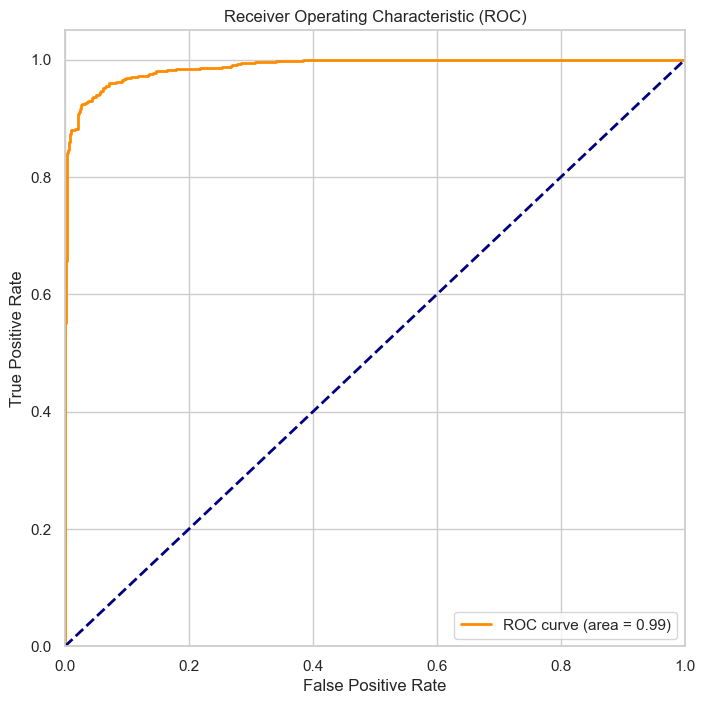

In [151]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# ROC curve and AUC for the top 20 variables
fpr, tpr, thresholds = roc_curve(y_test_resampled, xgb_model.predict_proba(X_test_resampled)[:, 1])
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Best F1 Score for XGBoost: nan
XGBoost Accuracy: 0.852112676056338
Mean Squared Error for XGBoost: 0.14788732394366197
Root Mean Squared Error for XGBoost: 0.38456120961904355
              precision    recall  f1-score   support

           0       0.90      0.78      0.84       623
           1       0.82      0.92      0.86       655

    accuracy                           0.85      1278
   macro avg       0.86      0.85      0.85      1278
weighted avg       0.86      0.85      0.85      1278



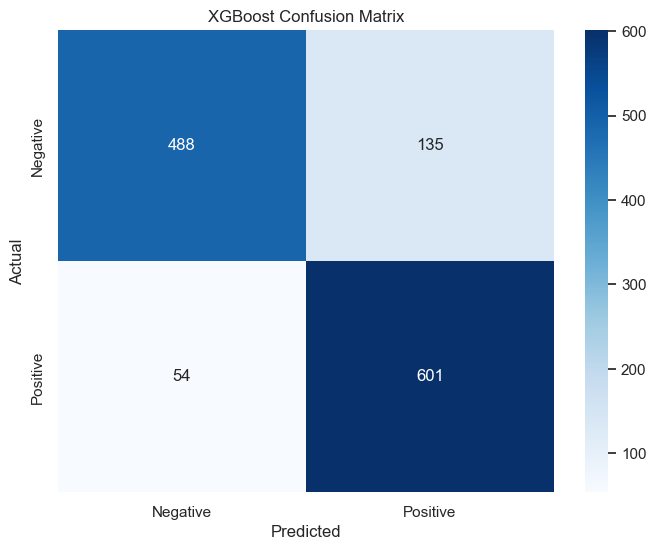

In [35]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, mean_squared_error, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Creating a custom scorer for F1 score
f1_class_1_scorer = make_scorer(f1_score, pos_label='yes')

# Defining the parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Setting up the XGBoost Classifier
xgb_clf = XGBClassifier(random_state=42)

# Setting up GridSearchCV with F1 score as the scoring metric
grid_search_xgb = GridSearchCV(estimator=xgb_clf,
                                param_grid=param_grid_xgb,
                                scoring=f1_class_1_scorer,
                                cv=5,
                                verbose=1)

# Fit GridSearchCV on your data
grid_search_xgb.fit(X_train_resampled, y_train_resampled)

# Best parameters and best score for XGBoost
best_params_xgb = grid_search_xgb.best_params_
best_score_xgb = grid_search_xgb.best_score_

print("Best Parameters for XGBoost:", best_params_xgb)
print("Best F1 Score for XGBoost:", best_score_xgb)

#  XGBoost model
xgb_model = XGBClassifier(**best_params_xgb, random_state=42)

# pipeline
xgb_pipeline = Pipeline(steps=[('classifier', xgb_model)])

# Train 
xgb_pipeline.fit(X_train_resampled, y_train_resampled)

#predictions
y_pred_xgb = xgb_pipeline.predict(X_test_resampled)

# Evaluate accuracy
xgb_accuracy = accuracy_score(y_test_resampled, y_pred_xgb)
print("XGBoost Accuracy:", xgb_accuracy)

# Calculate evaluation metrics
mse_xgb = mean_squared_error(y_test_resampled, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
print(f'Mean Squared Error for XGBoost: {mse_xgb}')
print(f'Root Mean Squared Error for XGBoost: {rmse_xgb}')

print(classification_report(y_test_resampled, y_pred_xgb))

xgb_conf_matrix = confusion_matrix(y_test_resampled, y_pred_xgb)

#confusion matrix 
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Gradient Boosting Accuracy: 0.9241001564945227
Mean Squared Error for Gradient Boosting: 0.07589984350547731
Root Mean Squared Error for Gradient Boosting: 0.27549926225940663
              precision    recall  f1-score   support

           0       0.92      0.92      0.92       623
           1       0.93      0.92      0.93       655

    accuracy                           0.92      1278
   macro avg       0.92      0.92      0.92      1278
weighted avg       0.92      0.92      0.92      1278



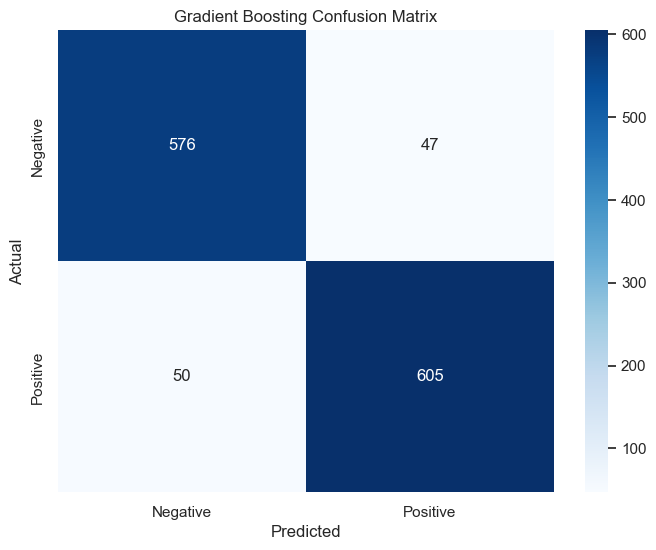

In [34]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, mean_squared_error, confusion_matrix
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns
gb_model = GradientBoostingClassifier(random_state=42)

# Create the pipeline
gb_pipeline = Pipeline(steps=[('classifier', gb_model)])

# Train the model on the resampled training data
gb_pipeline.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_gb = gb_pipeline.predict(X_test_resampled)

# Evaluate accuracy
gb_accuracy = accuracy_score(y_test_resampled, y_pred_gb)
print("Gradient Boosting Accuracy:", gb_accuracy)

# Calculate evaluation metrics
mse_gb = mean_squared_error(y_test_resampled, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)

# Print the metrics
print(f'Mean Squared Error for Gradient Boosting: {mse_gb}')
print(f'Root Mean Squared Error for Gradient Boosting: {rmse_gb}')

print(classification_report(y_test_resampled, y_pred_gb))

gb_conf_matrix = confusion_matrix(y_test_resampled, y_pred_gb)

# Plot confusion matrix for Gradient Boosting
plt.figure(figsize=(8, 6))
sns.heatmap(gb_conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Gradient Boosting Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Best Parameters for Gradient Boosting: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 50}
Best F1 Score for Gradient Boosting: nan
XGB Accuracy: 0.9444444444444444
Mean Squared Error for XGB: 0.05555555555555555
Root Mean Squared Error for XGB: 0.23570226039551584
R-squared Score for XGB: 0.7776383664367197
              precision    recall  f1-score   support

           0       0.93      0.96      0.94       623
           1       0.96      0.93      0.95       655

    accuracy                           0.94      1278
   macro avg       0.94      0.94      0.94      1278
weighted avg       0.94      0.94      0.94      1278



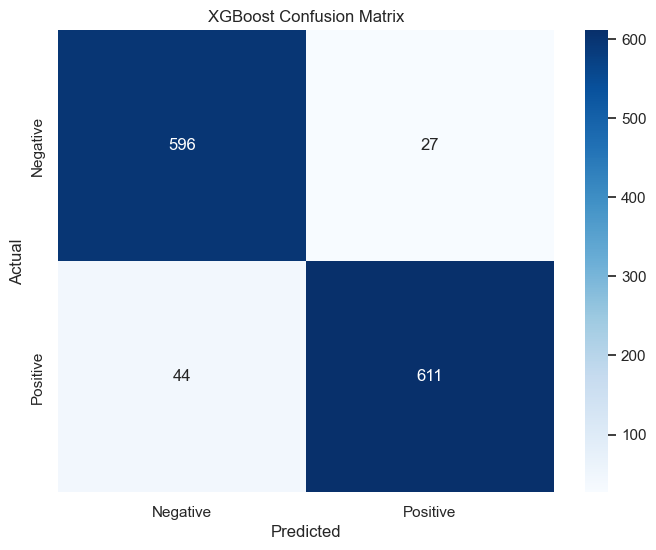

In [171]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, average_precision_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Creating a custom scorer for F1 score
f1_class_1_scorer = make_scorer(f1_score, pos_label='yes')

# Defining the parameter grid for Gradient Boosting
param_grid_gb = {
    'n_estimators': [50, 100, 150],  # default=100 - larger values are likely to lead to overfitting
    'max_depth': [1, 2, 3, 4, 5],  # default=3
    'learning_rate': [0.1, 0.2],  # default=0.1, [0.01 - 0.2]
}

# Setting up the Gradient Boosting Classifier
gb_clf = GradientBoostingClassifier(random_state=42)

# Setting up GridSearchCV with F1 score as the scoring metric
grid_search_gb = GridSearchCV(estimator=gb_clf,
                              param_grid=param_grid_gb,
                              scoring=f1_class_1_scorer,
                              cv=5,
                              verbose=1)

# Fit GridSearchCV on your data
grid_search_gb.fit(X_train_resampled, y_train_resampled)

# Best parameters and best score for Gradient Boosting
best_params_gb = grid_search_gb.best_params_
best_score_gb = grid_search_gb.best_score_

print("Best Parameters for Gradient Boosting:", best_params_gb)
print("Best F1 Score for Gradient Boosting:", best_score_gb)

# Define the XGBoost model
xgb_model = XGBClassifier(random_state=42)

# Create the pipeline
xgb_pipeline = Pipeline(steps=[('classifier', xgb_model)])

# Train the model on the resampled training data
xgb_pipeline.fit(X_train_resampled, y_train_resampled)

# Make predictions on the test set
y_pred_xgb = xgb_pipeline.predict(X_test_resampled)

# Evaluate accuracy
xgb_accuracy = accuracy_score(y_test_resampled, y_pred_xgb)
print("XGB Accuracy:", xgb_accuracy)

# Calculate evaluation metrics
mse_xgb = mean_squared_error(y_test_resampled, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test_resampled, y_pred_xgb)

# Print the metrics
print(f'Mean Squared Error for XGB: {mse_xgb}')
print(f'Root Mean Squared Error for XGB: {rmse_xgb}')
print(f'R-squared Score for XGB: {r2_xgb}')

print(classification_report(y_test_resampled, y_pred_xgb))

xgb_conf_matrix = confusion_matrix(y_test_resampled, y_pred_xgb)

# Plot confusion matrix for XGB
plt.figure(figsize=(8, 6))
sns.heatmap(xgb_conf_matrix, annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('XGBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Ensemble Accuracy: 0.8333333333333334
Mean Absolute Error: 0.16666666666666666
Mean Squared Error: 0.16666666666666666
Ensemble - Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.73      0.81       623
           1       0.78      0.93      0.85       655

    accuracy                           0.83      1278
   macro avg       0.85      0.83      0.83      1278
weighted avg       0.85      0.83      0.83      1278



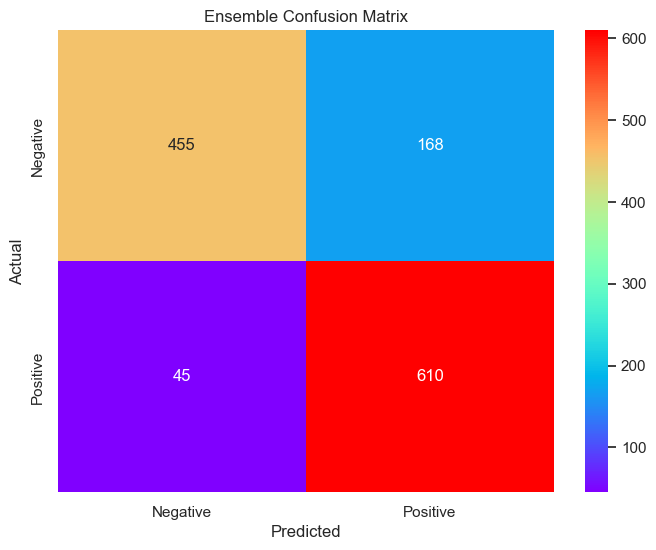

In [174]:
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, mean_absolute_error, mean_squared_error, confusion_matrix

# Creating individual models with specified parameters
decision_tree_clf = DecisionTreeClassifier(max_depth=4, random_state=42)
decision_tree_clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
logit_clf = LogisticRegression(C=100, max_iter=1000, random_state=42)

# Combining the models in a voting ensemble
# We use 'soft' voting to predict the class label based on the argmax of the sums of the predicted probabilities
ensemble_clf = VotingClassifier(
    estimators=[('dt', decision_tree_clf), ('dt2', decision_tree_clf2)],
    voting='soft'
)

# Training the ensemble model
ensemble_clf.fit(X_train_resampled, y_train_resampled)

# Predicting and evaluating on the test set
y_pred_ensemble = ensemble_clf.predict(X_test_resampled)
ensemble_accuracy = accuracy_score(y_test_resampled, y_pred_ensemble)
ensemble_precision = precision_score(y_test_resampled, y_pred_ensemble)
ensemble_recall = recall_score(y_test_resampled, y_pred_ensemble)
ensemble_f1_score = f1_score(y_test_resampled, y_pred_ensemble, pos_label=1)

ensemble_accuracy = accuracy_score(y_test_resampled, y_pred_ensemble)
print("Ensemble Accuracy:", ensemble_accuracy)

# Calculate evaluation metrics
mae_ensemble = mean_absolute_error(y_test_resampled, y_pred_ensemble)
mse_ensemble = mean_squared_error(y_test_resampled, y_pred_ensemble)
print(f'Mean Absolute Error: {mae_ensemble}')
print(f'Mean Squared Error: {mse_ensemble}')

# Print classification report
print("Ensemble - Classification Report:")
print(classification_report(y_test_resampled, y_pred_ensemble))

# Print confusion matrix
ensemble_conf_matrix = confusion_matrix(y_test_resampled, y_pred_ensemble)
plot_confusion_matrix(ensemble_conf_matrix, ['Negative', 'Positive'], 'Ensemble')

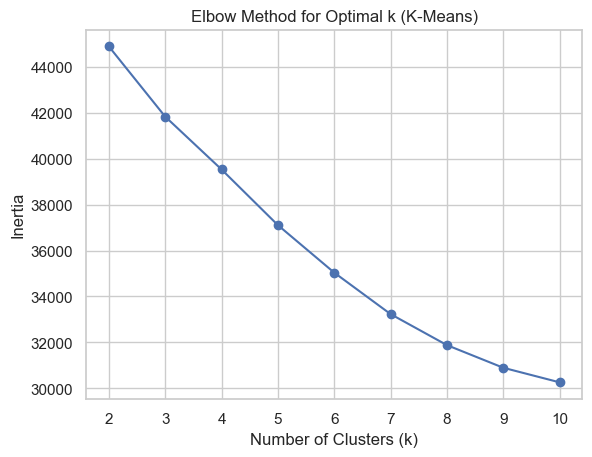

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome  \
0  cellular   19   oct        79         1     -1         0  unknown   
1  cellular   11   may       220         1    339         4  failure   
2  cellular   16   apr       185         1    330         1  failure   
3   unknown    3   jun       199         4     -1         0  unknown   
4   unknown    5   may       226         1     -1         0  unknown   

   cluster_label  
0              0  
1              1  
2              1  
3              0  
4              2  
Silhouette Sco

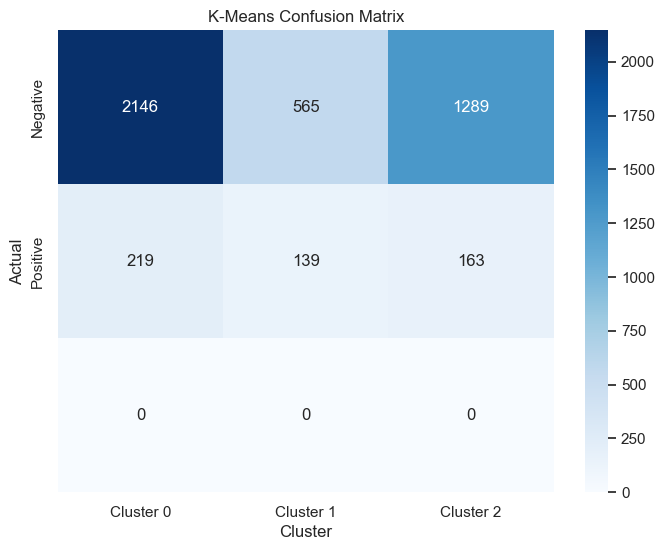

In [32]:
# Apply preprocessing to the data
X_preprocessed = preprocessor.fit_transform(X)

# Determine the optimal number of clusters using the elbow method
inertia = []
possible_k_values = range(2, 11)  # Try k values from 2 to 10
for k_value in possible_k_values:
    kmeans = KMeans(n_clusters=k_value, random_state=42)
    kmeans.fit(X_preprocessed)
    inertia.append(kmeans.inertia_)

# Plot the elbow method
plt.plot(possible_k_values, inertia, marker='o')
plt.title('Elbow Method for Optimal k (K-Means)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

# Based on the elbow method, select the optimal number of clusters (k)
optimal_k = 3  # Replace with the number you choose

# Create the KMeans model
kmeans_model = KMeans(n_clusters=optimal_k, random_state=42)

# Create the pipeline for KMeans clustering
pipeline_kmeans = Pipeline(steps=[('preprocessor', preprocessor), ('kmeans', kmeans_model)])

# Fit the KMeans model
pipeline_kmeans.fit(X)

# Get cluster labels for each data point
cluster_labels = pipeline_kmeans.predict(X)

# Add cluster labels to the original data
X_with_clusters = X.copy()
X_with_clusters['cluster_label'] = cluster_labels

# Print the data with cluster labels
print(X_with_clusters.head())

# Evaluate silhouette score
silhouette_avg = silhouette_score(X_preprocessed, cluster_labels)
print(f'Silhouette Score: {silhouette_avg}')

# Additional Evaluation Metrics (if applicable for clustering)
# For clustering, we do not have a ground truth to calculate accuracy or confusion matrix.

# Plot the confusion matrix (if applicable for clustering)
if len(set(y)) > 1:
    # Only plot the confusion matrix if there are multiple classes
    kmeans_conf_matrix = confusion_matrix(y, cluster_labels)
    plt.figure(figsize=(8, 6))
    sns.heatmap(kmeans_conf_matrix, annot=True, fmt="d", cmap="Blues",
                xticklabels=[f'Cluster {i}' for i in range(optimal_k)],
                yticklabels=['Negative', 'Positive'])
    plt.title('K-Means Confusion Matrix')
    plt.xlabel('Cluster')
    plt.ylabel('Actual')
    plt.show()

Fitting 5 folds for each of 9 candidates, totalling 45 fits
AdaBoost Accuracy: 0.7582159624413145
AdaBoost F1 Score: 0.7867494824016564
              precision    recall  f1-score   support

           0       0.82      0.64      0.72       623
           1       0.72      0.87      0.79       655

    accuracy                           0.76      1278
   macro avg       0.77      0.76      0.75      1278
weighted avg       0.77      0.76      0.75      1278



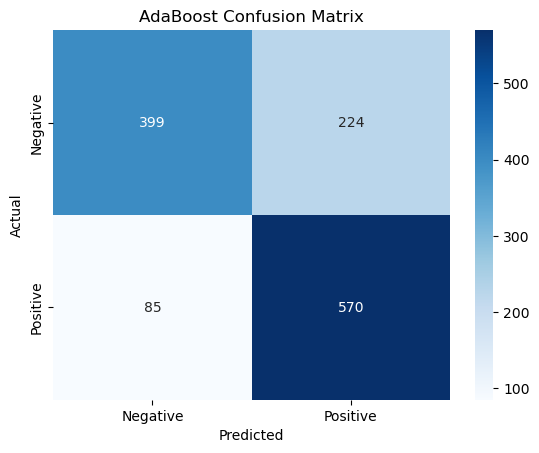

In [21]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Define the parameter grid for AdaBoost
param_grid_adaboost = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0]
}

# Perform GridSearchCV with F1 score as the scoring metric
grid_search_adaboost = GridSearchCV(AdaBoostClassifier(random_state=42), param_grid_adaboost, scoring=f1_class_1_scorer, cv=5, verbose=1)
grid_search_adaboost.fit(X_train_resampled, y_train_resampled)

# Create and fit the model with the best parameters
adaboost_model = AdaBoostClassifier(**grid_search_adaboost.best_params_, random_state=42)
adaboost_model.fit(X_train_resampled, y_train_resampled)

# Make predictions and evaluate accuracy and F1 score
y_pred_adaboost = adaboost_model.predict(X_test_resampled)
adaboost_accuracy = accuracy_score(y_test_resampled, y_pred_adaboost)
adaboost_f1score = f1_score(y_test_resampled, y_pred_adaboost, pos_label=1)

# Print results
print("AdaBoost Accuracy:", adaboost_accuracy)
print("AdaBoost F1 Score:", adaboost_f1score)
print(classification_report(y_test_resampled, y_pred_adaboost))

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test_resampled, y_pred_adaboost), annot=True, fmt="d", cmap="Blues",
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('AdaBoost Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

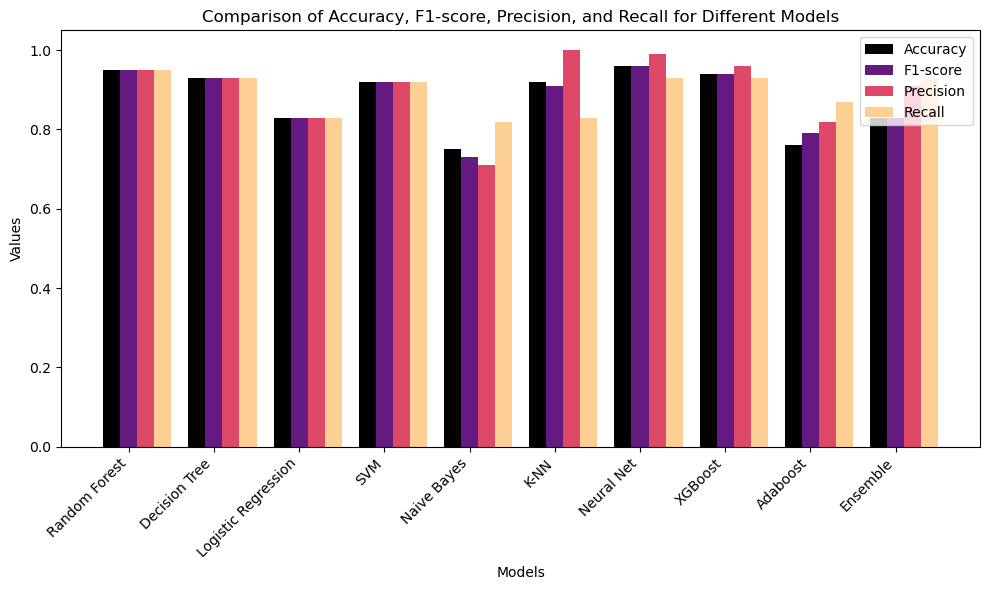

In [31]:
import matplotlib.pyplot as plt
import numpy as np

# Model names
models = ['Random Forest', 'Decision Tree', 'Logistic Regression', 'SVM', 'Naive Bayes', 'K-NN', 'Neural Net', 'XGBoost', 'Adaboost', 'Ensemble']

# F1 Score, Accuracy, Precision, and Recall values for each model
f1_score_values = [0.95, 0.93, 0.83, 0.92, 0.73, 0.91, 0.96, 0.94, 0.79, 0.83]
accuracy_values = [0.95, 0.93, 0.83, 0.92, 0.75, 0.92, 0.96, 0.94, 0.76, 0.83]
precision_values = [0.95, 0.93, 0.83, 0.92, 0.71, 1.00, 0.99, 0.96, 0.82, 0.91]
recall_values = [0.95, 0.93, 0.83, 0.92, 0.82, 0.83, 0.93, 0.93, 0.87, 0.93]
# Set up the figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.2

# Bar positions
bar_positions_accuracy = np.arange(len(models))
bar_positions_f1_score = bar_positions_accuracy + bar_width
bar_positions_precision = bar_positions_f1_score + bar_width
bar_positions_recall = bar_positions_precision + bar_width

# Plotting the stacked bars
ax.bar(bar_positions_accuracy, accuracy_values, width=bar_width, label='Accuracy', color=plt.cm.magma(0))
ax.bar(bar_positions_f1_score, f1_score_values, width=bar_width, label='F1-score', color=plt.cm.magma(0.3))
ax.bar(bar_positions_precision, precision_values, width=bar_width, label='Precision', color=plt.cm.magma(0.6))
ax.bar(bar_positions_recall, recall_values, width=bar_width, label='Recall', color=plt.cm.magma(0.9))

# Add labels and legend
ax.set_xticks(bar_positions_f1_score)
ax.set_xticklabels(models, rotation=45, ha="right")
ax.set_xlabel('Models')
ax.set_ylabel('Values')
ax.set_title('Comparison of Accuracy, F1-score, Precision, and Recall for Different Models')
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()


In [43]:
df = pd.DataFrame(data)

# Create Parallel Coordinates Plot
fig = px.parallel_coordinates(df,color_continuous_scale=px.colors.diverging.Tealrose,
                               labels={"loan_approval": "Loan Approval"},
                               dimensions=["age", "balance", "duration", "campaign"],
                               title="Parallel Coordinates Plot for Dataset")

# Show the plot
fig.show()

In [49]:
import plotly.express as px
import plotly.graph_objects as go



# Create a bar chart for the cake layers
fig_layers = px.bar(df, x='age', y='balance', color='loan_approval',
                    labels={'age': 'Layer Age', 'balance': 'Layer Balance'},
                    color_discrete_map={'no': '#FFD700', 'yes': '#FF4500'},
                    title='Loan Approval Cake Layers')


# Create a scatter plot for candles
fig_candles = px.scatter(df, x='age', y='duration', color='loan_approval',
                         labels={'age': 'Age', 'height': 'Height'},
                         color_discrete_map={'no': '#FFD700', 'yes': '#FF4500'},
                         symbol='loan_approval', title='Duration')

# Combine the two plots to resemble a birthday cake
fig_cake = go.Figure()

for data in fig_layers.data:
    fig_cake.add_trace(data)

for data in fig_candles.data:
    fig_cake.add_trace(data)

# Update layout for a more festive look
fig_cake.update_layout(title='Loan Approval!',
                       xaxis_title='Age',
                       yaxis_title='Balance',
                       showlegend=False,
                       paper_bgcolor='#FFDAB9')

# Show the plot
fig_cake.show()


In [55]:
# Create a donut chart
fig_donut = px.pie(df, names='loan_approval',
                   hole=0.4, color='loan_approval',
                   color_discrete_map={'no': '#FFD700', 'yes': '#FF4500'},
                   title='Loan Approval Distribution')

# Update layout for a more fun look
fig_donut.update_layout(showlegend=True)  # Set background color to pastel peach

# Show the plot
fig_donut.show()

In [71]:
import plotly.express as px
import pandas as pd

# Assume 'y_resampled' is the target variable after SMOTE

# Convert numerical classes back to original labels
y_resampled_labels = le.inverse_transform(y_resampled)

# Create a DataFrame for plotting
plot_data = pd.DataFrame({'count': pd.Series(y_resampled_labels).value_counts().sort_index()})

# Create a pie chart
fig_pie = px.pie(plot_data, names=plot_data.index, values='count',
                 hole=0.4, title='Target Variable Distribution after SMOTE 🍩')

# Update layout for a more fun look
fig_pie.update_layout(showlegend=False, paper_bgcolor='#FFDAB9')  # Set background color to pastel peach

# Show the plot
fig_pie.show()
